## Image Analytics - Checkbox tutorial

### import dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os
import sys
sns.set()

In [2]:

#print(sys.path)
#print(sys.executable)
#print(os)
#print(os.getcwd())
#!pip install keract==2.8.4
#!conda list

### Helper Functions

In [3]:
def show_color_img(img):
    fig = plt.imshow(img[:,:,::-1])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
def show_grey_img(img):
    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

### Import an image using OpenCV

In [4]:
img = cv2.imread('checkboxes\\accept\\Bildschirmfoto 2019-06-06 um 20.20.42.png')#Bildschirmfoto 2019-06-06 um 20.09.08.png')

### Display image, its format (shape) and the pixel value distribution

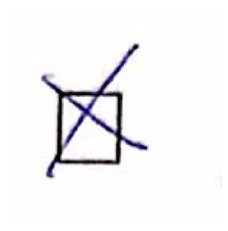

In [5]:
show_color_img(img)

In [6]:
img.shape

(702, 692, 3)

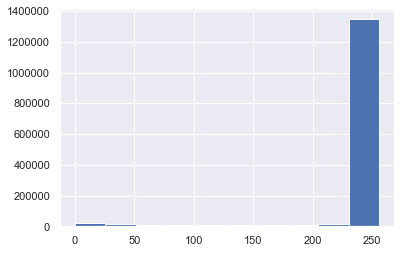

In [7]:
plt.hist(img.ravel(), 10, [0, 256])  # , 10, [0, 1])
plt.show()

In [8]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_grey.shape

(702, 692)

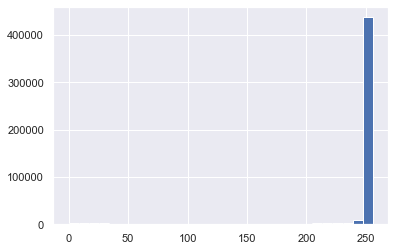

In [9]:
plt.hist(img_grey.ravel(), 30, [0, 256])
plt.show()

### Define two diagonal kernels

In [10]:
filter_1 = np.array([[-2, -1, 0],
                    [-1, 0, 1],
                    [0, 1, 2]])

filter_2 = np.array([[0, -1, -2],
                    [1, 0, -1],
                    [2, 1, 0]])


### Transform the image with the two kernels and show the result

In [11]:
img_filter_1 = cv2.filter2D(img_grey, -1, filter_1)
img_filter_2 = cv2.filter2D(img_grey, -1, filter_2)

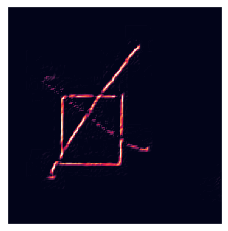

In [12]:
show_grey_img(img_filter_1)

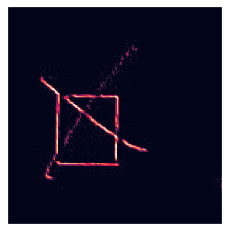

In [13]:
show_grey_img(img_filter_2)

### Add both activation maps to a total

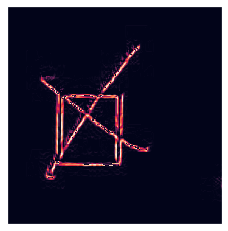

In [14]:
total = img_filter_1 + img_filter_2
show_grey_img(total)

### Reduce the maps to a single value (mean)

In [15]:
print("mean activation img_filter_1:", img_filter_1.mean())
print("mean activation img_filter_2:", img_filter_2.mean())
print("mean activation sum:", total.mean())

mean activation img_filter_1: 4.496486092584359
mean activation img_filter_2: 4.219200303015332
mean activation sum: 7.201663702386246


###  Combine the convolutions and addition into one function

In [16]:
filter_1 = np.array([[-2, -1, 0],
                    [-1, 0, 1],
                    [0, 1, 2]])
filter_2 = np.array([[0, -1, -2],
                    [1, 0, -1],
                    [2, 1, 0]])
    
def anaylze_img(img):
    """takes the input image, convolutes it with two convolutions and returns the mean of the sum of activations
    """
    f1 = cv2.filter2D(img, -1, filter_1)
    f2 = cv2.filter2D(img, -1, filter_2)
    return (f1+f2).mean()

### Analyze all images in the dataset. Save the results in a Pandas Dataframe

In [17]:
dir_ok = 'checkboxes\\accept'
dir_not = 'checkboxes\\reject'

ok_img_arr = list()
not_ok_img_arr = list()

for filename in os.listdir(dir_ok):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(dir_ok, filename),0)
        print(img.shape, filename)
        ok_img_arr.append(anaylze_img(img))

for filename in os.listdir(dir_not):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(dir_not, filename),0)
        print(img.shape, filename)
        not_ok_img_arr.append(anaylze_img(img))

ok_df = pd.DataFrame(ok_img_arr, columns=["value"])
ok_df["class"] = "ok"
not_df = pd.DataFrame(not_ok_img_arr, columns=["value"])
not_df["class"] = "rejected"
df = ok_df.append(not_df)

(1102, 952) Bildschirmfoto 2019-06-06 um 20.08.51.png
(1050, 1046) Bildschirmfoto 2019-06-06 um 20.08.57.png
(966, 864) Bildschirmfoto 2019-06-06 um 20.09.03.png
(802, 800) Bildschirmfoto 2019-06-06 um 20.09.08.png
(888, 842) Bildschirmfoto 2019-06-06 um 20.09.11.png
(886, 962) Bildschirmfoto 2019-06-06 um 20.09.16.png
(834, 740) Bildschirmfoto 2019-06-06 um 20.09.19.png
(704, 680) Bildschirmfoto 2019-06-06 um 20.09.24.png
(656, 690) Bildschirmfoto 2019-06-06 um 20.09.26.png
(776, 776) Bildschirmfoto 2019-06-06 um 20.09.34.png
(778, 828) Bildschirmfoto 2019-06-06 um 20.09.38.png
(830, 858) Bildschirmfoto 2019-06-06 um 20.09.41.png
(702, 688) Bildschirmfoto 2019-06-06 um 20.09.45.png
(738, 660) Bildschirmfoto 2019-06-06 um 20.09.48.png
(882, 840) Bildschirmfoto 2019-06-06 um 20.09.52.png
(738, 604) Bildschirmfoto 2019-06-06 um 20.09.56.png
(706, 780) Bildschirmfoto 2019-06-06 um 20.09.59.png
(652, 650) Bildschirmfoto 2019-06-06 um 20.10.02.png
(734, 702) Bildschirmfoto 2019-06-06 um 20.

(542, 522) Bildschirmfoto 2019-06-06 um 20.20.16.png
(496, 454) Bildschirmfoto 2019-06-06 um 20.20.19.png
(660, 658) Bildschirmfoto 2019-06-06 um 20.20.22.png
(662, 748) Bildschirmfoto 2019-06-06 um 20.20.25.png
(632, 584) Bildschirmfoto 2019-06-06 um 20.20.34.png
(736, 736) Bildschirmfoto 2019-06-06 um 20.20.37.png
(710, 600) Bildschirmfoto 2019-06-06 um 20.20.39.png
(702, 692) Bildschirmfoto 2019-06-06 um 20.20.42.png
(560, 536) Bildschirmfoto 2019-06-06 um 20.20.46.png
(620, 578) Bildschirmfoto 2019-06-06 um 20.20.48.png
(608, 636) Bildschirmfoto 2019-06-06 um 20.20.52.png
(722, 574) Bildschirmfoto 2019-06-06 um 20.20.54.png
(610, 512) Bildschirmfoto 2019-06-06 um 20.20.56.png
(690, 684) Bildschirmfoto 2019-06-06 um 20.21.01.png
(590, 530) Bildschirmfoto 2019-06-06 um 20.21.03.png
(616, 686) Bildschirmfoto 2019-06-06 um 20.21.06.png
(658, 606) Bildschirmfoto 2019-06-06 um 20.21.08.png
(746, 620) Bildschirmfoto 2019-06-06 um 20.21.11.png
(650, 560) Bildschirmfoto 2019-06-06 um 20.21.

(562, 542) Bildschirmfoto 2019-06-06 um 20.30.09.png
(328, 330) Bildschirmfoto 2019-06-06 um 20.30.11.png
(698, 628) Bildschirmfoto 2019-06-06 um 20.30.14.png
(628, 744) Bildschirmfoto 2019-06-06 um 20.30.18.png
(1070, 1050) Bildschirmfoto 2019-06-06 um 19.40.07.png
(1082, 1082) Bildschirmfoto 2019-06-06 um 19.40.12.png
(1200, 1154) Bildschirmfoto 2019-06-06 um 19.40.16.png
(1084, 1086) Bildschirmfoto 2019-06-06 um 19.40.20.png
(1056, 1050) Bildschirmfoto 2019-06-06 um 19.40.25.png
(982, 1042) Bildschirmfoto 2019-06-06 um 19.40.29.png
(1048, 1028) Bildschirmfoto 2019-06-06 um 19.40.33.png
(1018, 1032) Bildschirmfoto 2019-06-06 um 19.40.38.png
(856, 874) Bildschirmfoto 2019-06-06 um 19.40.42.png
(1392, 1286) Bildschirmfoto 2019-06-06 um 19.40.56.png
(1284, 1194) Bildschirmfoto 2019-06-06 um 19.41.00.png
(1060, 1064) Bildschirmfoto 2019-06-06 um 19.41.04.png
(1120, 1070) Bildschirmfoto 2019-06-06 um 19.41.08.png
(1062, 1004) Bildschirmfoto 2019-06-06 um 19.41.13.png
(1088, 1094) Bildschi

(714, 664) Bildschirmfoto 2019-06-06 um 19.56.50.png
(794, 784) Bildschirmfoto 2019-06-06 um 19.56.53.png
(812, 800) Bildschirmfoto 2019-06-06 um 19.56.56.png
(800, 668) Bildschirmfoto 2019-06-06 um 19.56.58.png
(744, 674) Bildschirmfoto 2019-06-06 um 19.57.02.png
(822, 846) Bildschirmfoto 2019-06-06 um 19.57.06.png
(794, 790) Bildschirmfoto 2019-06-06 um 19.57.10.png
(800, 720) Bildschirmfoto 2019-06-06 um 19.57.13.png
(588, 616) Bildschirmfoto 2019-06-06 um 19.57.17.png
(640, 562) Bildschirmfoto 2019-06-06 um 19.57.20.png
(734, 764) Bildschirmfoto 2019-06-06 um 19.57.24.png
(792, 750) Bildschirmfoto 2019-06-06 um 19.57.29.png
(670, 738) Bildschirmfoto 2019-06-06 um 19.57.33.png
(632, 602) Bildschirmfoto 2019-06-06 um 19.57.36.png
(674, 658) Bildschirmfoto 2019-06-06 um 19.57.39.png
(836, 702) Bildschirmfoto 2019-06-06 um 19.57.42.png
(736, 768) Bildschirmfoto 2019-06-06 um 19.57.48.png
(822, 736) Bildschirmfoto 2019-06-06 um 19.57.51.png
(792, 712) Bildschirmfoto 2019-06-06 um 19.57.

(736, 810) Bildschirmfoto 2019-06-06 um 20.07.27.png
(538, 534) Bildschirmfoto 2019-06-06 um 20.07.30.png


### explore dataframe

In [18]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(10)

value     class
201   5.454260        ok
93    5.212546        ok
96    7.189973        ok
189   7.064981        ok
308   7.494312        ok
129   4.372339  rejected
60    5.211010  rejected
54    5.479898        ok
116  14.899593        ok
127   8.019154        ok

### create a histogram of the values column

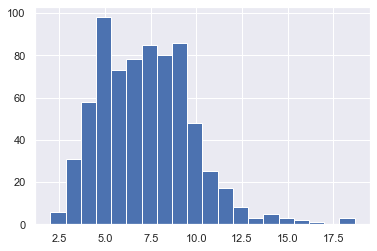

In [19]:
df.value.hist(bins=20)

### Plot the difference for each class

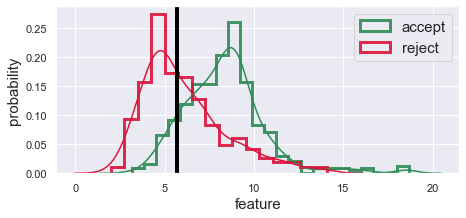

In [20]:
# Split the data according to the class
target_0 = df.loc[df['class'] == "ok"]
target_1 = df.loc[df['class'] == "rejected"]

# Initialize a new plot
fig, ax = plt.subplots(figsize=(7,4))
fig.subplots_adjust(left=0.1, bottom=0.3, right=None, top=None, wspace=None, hspace=None)

# Create the historgrams with kernel density estimation
sns.distplot(target_0[['value']], color="seagreen",  hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.9, "color": "seagreen"}, label="accept")
sns.distplot(target_1[['value']], color="crimson",  hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.9, "color": "crimson"}, label="reject")

# Visualize a threshold value that could act as a decision boundary
threshold = 5.7
ax.axvline(x=threshold, ymin=0, ymax=1, color="black", linewidth=4)    

# Make the location of the legend pretty
ax.legend()
plt.legend(loc=1, prop={'size': 15})
ax.set_xlabel('feature', fontsize=15)
ax.set_ylabel('probability', fontsize=15)

plt.show()

# Using Deep Learning for the checkbox classification problem


In [21]:
#Import utilities

from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
from keras import backend as K
from keras_radam import RAdam
import datetime
    
from keras import backend as K
K.set_session

Using TensorFlow backend.
C:\Users\julian.marstaller\.conda\envs\atenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\julian.marstaller\.conda\envs\atenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\julian.marstaller\.conda\envs\atenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\julian.mars

<function keras.backend.tensorflow_backend.set_session(session)>

## Model parameters

In [43]:
input_shape=(224,224,1)
classes = ['reject','accept']
num_classes = len(classes)

## Define a sequential model that uses convolutions to classify the image

In [38]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(124, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(124, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

## Compile the model, define the optimization criteria and log config

In [39]:
opt = RAdam(warmup_proportion=0.1, min_lr=0.01)

model.compile(opt, loss='binary_crossentropy') #'mean_absolute_error')

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,
                                                      histogram_freq=1,
                                                      write_graph=True,
                                                      write_grads=True,
                                                      write_images=True)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 4)       40        
_________________________________________________________________
batch_normalization_11 (Batc (None, 224, 224, 4)       16        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 4)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 4)       148       
_________________________________________________________________
batch_normalization_12 (Batc (None, 112, 112, 4)       16        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 4)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 8)        

## Prepare Training Data

### define image preprocessing steps

In [25]:
def preprocess_img(path):
    """ this function recieves a path of an image.
        Preprocessing includes the following:
        1) Reading the image from the path
        2) Making it grayscale
        3) Resizing the image to a fixed 224 height and 224 width
        4) Normalize all image values to a range of 0 and 1 (format must be float!)
        5) Adjust the shape of the array to match the input shape
    """
    img = cv2.imread(path,0)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img,(224,224))
    img_normalized = cv2.normalize(img_resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img_preprocessed = np.expand_dims(img_normalized, axis=2)
    return img_preprocessed

## Preprocess the train and test sets

In [26]:
x_train, y_train, x_test, y_test = [],[],[],[]

def add_files(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img = preprocess_img(os.path.join(directory, filename))
            if np.random.choice([True,False], 1, p=[0.8, 0.2]):
                x_train.append(img)
                y_train.append(label)
            else:
                x_test.append(img)
                y_test.append(label)
            
add_files('checkboxes\\accept', 1)
add_files('checkboxes\\reject', 0)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

x_train, y_train = unison_shuffled_copies(x_train, y_train)
x_test, y_test = unison_shuffled_copies(x_test, y_test)

In [42]:
y_train[0]

array([0., 1.], dtype=float32)

### Convert the class labels to One-Hot-Encodings

In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(561, 224, 224, 1) (561, 2) (149, 224, 224, 1) (149, 2)


## Train Model

In [29]:
batch_size=16
epochs=10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 561 samples, validate on 149 samples
Epoch 1/10
561/561 [==============================] - 19s 34ms/step - loss: 1.0689 - val_loss: 0.6992
Epoch 2/10
561/561 [==============================] - 15s 27ms/step - loss: 0.6740 - val_loss: 0.6995
Epoch 3/10
561/561 [==============================] - 14s 24ms/step - loss: 0.5983 - val_loss: 0.6814
Epoch 4/10
561/561 [==============================] - 14s 25ms/step - loss: 0.5115 - val_loss: 0.6582
Epoch 5/10
561/561 [==============================] - 14s 25ms/step - loss: 0.4603 - val_loss: 0.5934
Epoch 6/10
561/561 [==============================] - 15s 26ms/step - loss: 0.4373 - val_loss: 0.4912
Epoch 7/10
561/561 [==============================] - 13s 23ms/step - loss: 0.3756 - val_loss: 0.4247
Epoch 8/10
561/561 [==============================] - 13s 24ms/step - loss: 0.3701 - val_loss: 0.3511
Epoch 9/10
561/561 [=======================

# Model Evaluation

## Create a prediction vector with the probabilities and the predicted class label

In [46]:
prob_pred = model.predict(x_test)
y_pred = np.argmax(prob_pred, axis=1)

Prediction Probabilites: [0.50069886 0.4993011 ]
Predicted Class: reject


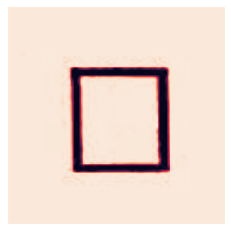

In [47]:
i = np.random.randint(len(y_pred))
show_grey_img(np.squeeze(x_test[i], axis=2))
print("Prediction Probabilites:", prob_pred[i])
print("Predicted Class:", classes[y_pred[i]])

### Use the accuracy score to determine the quality of the model

In [48]:
from sklearn.metrics import accuracy_score, roc_curve, auc

test_acc = accuracy_score(np.argmax(prob_pred, axis=1), np.argmax(y_test, axis=1))
print("Test-Accuracy:", np.round(test_acc*100,4), "%")

Test-Accuracy: 48.9933 %


### Plot the Reciever Operating Characteristic

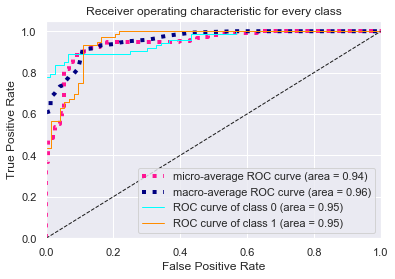

In [33]:
from scipy import interp
from itertools import cycle


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prob_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prob_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for every class')
plt.legend(loc="lower right")
plt.show()

## Display Feature Maps

In [34]:
#!pip install keract

conv2d_1/Relu:0 (1, 224, 224, 4) 


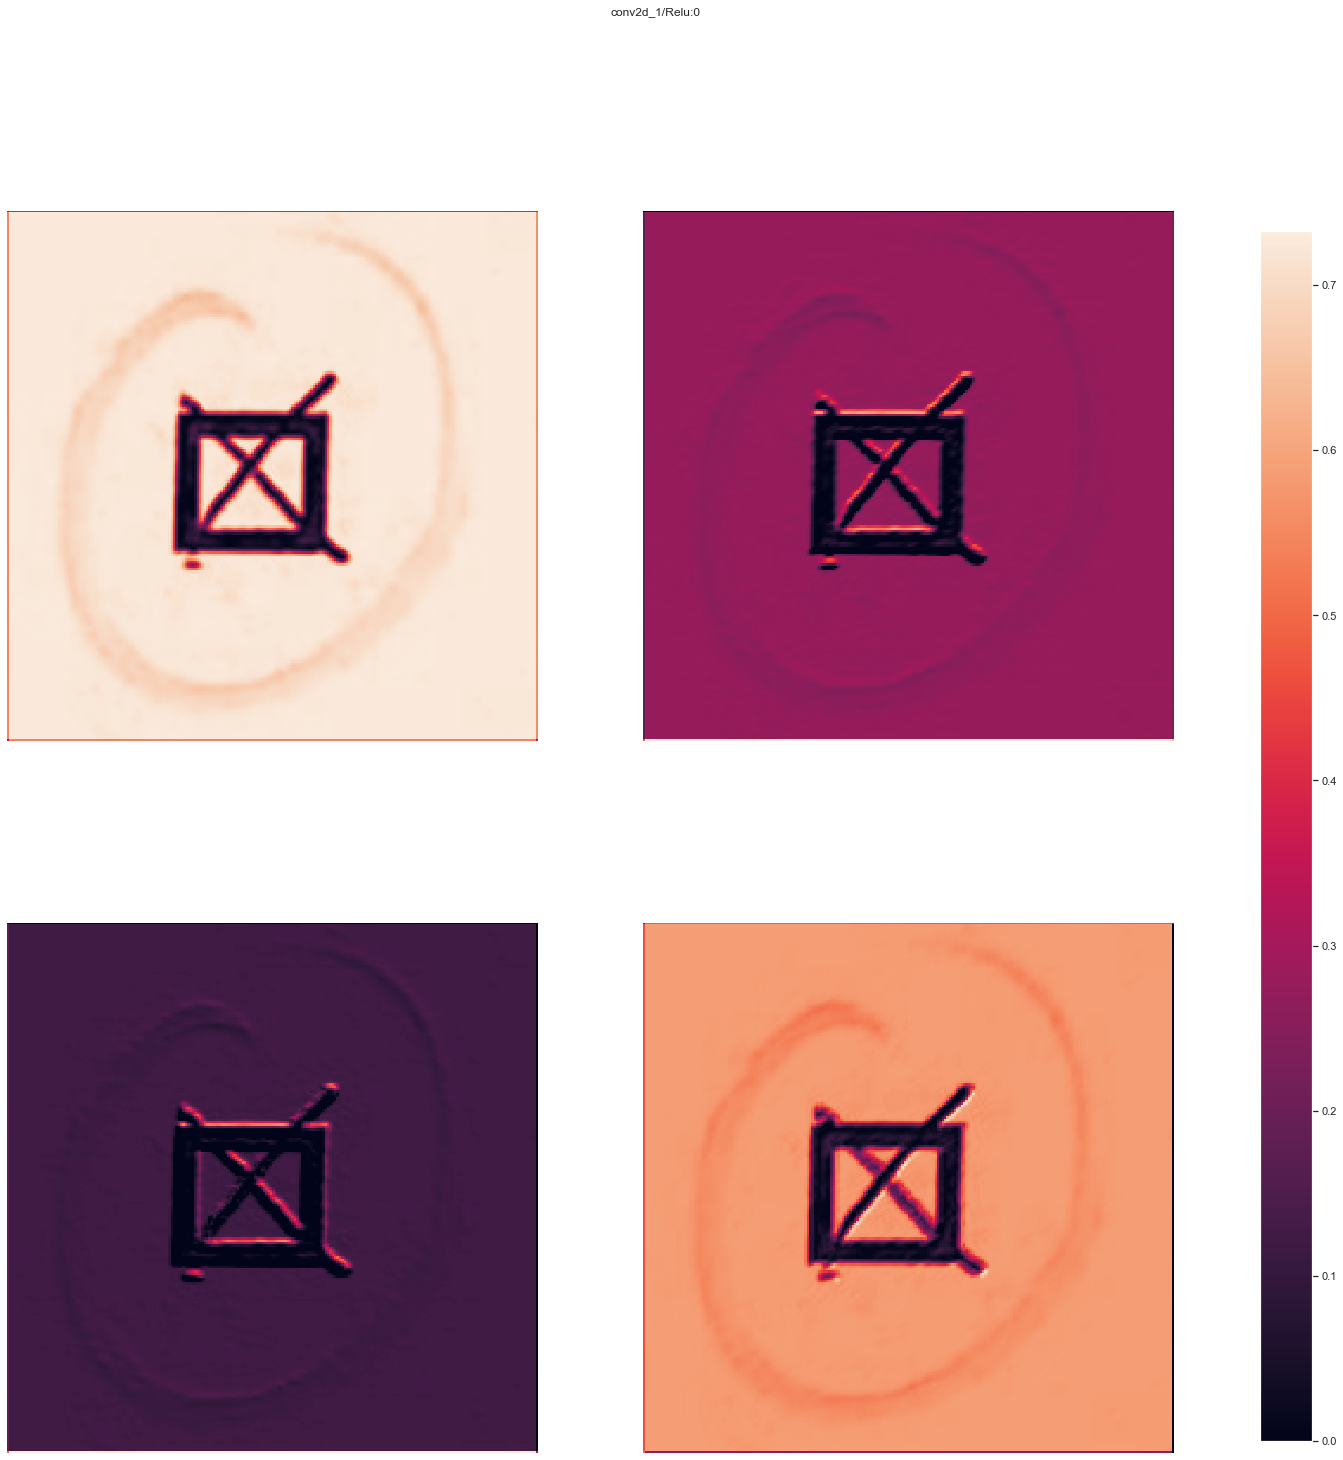

conv2d_1/Relu:0 (1, 224, 224, 4) 


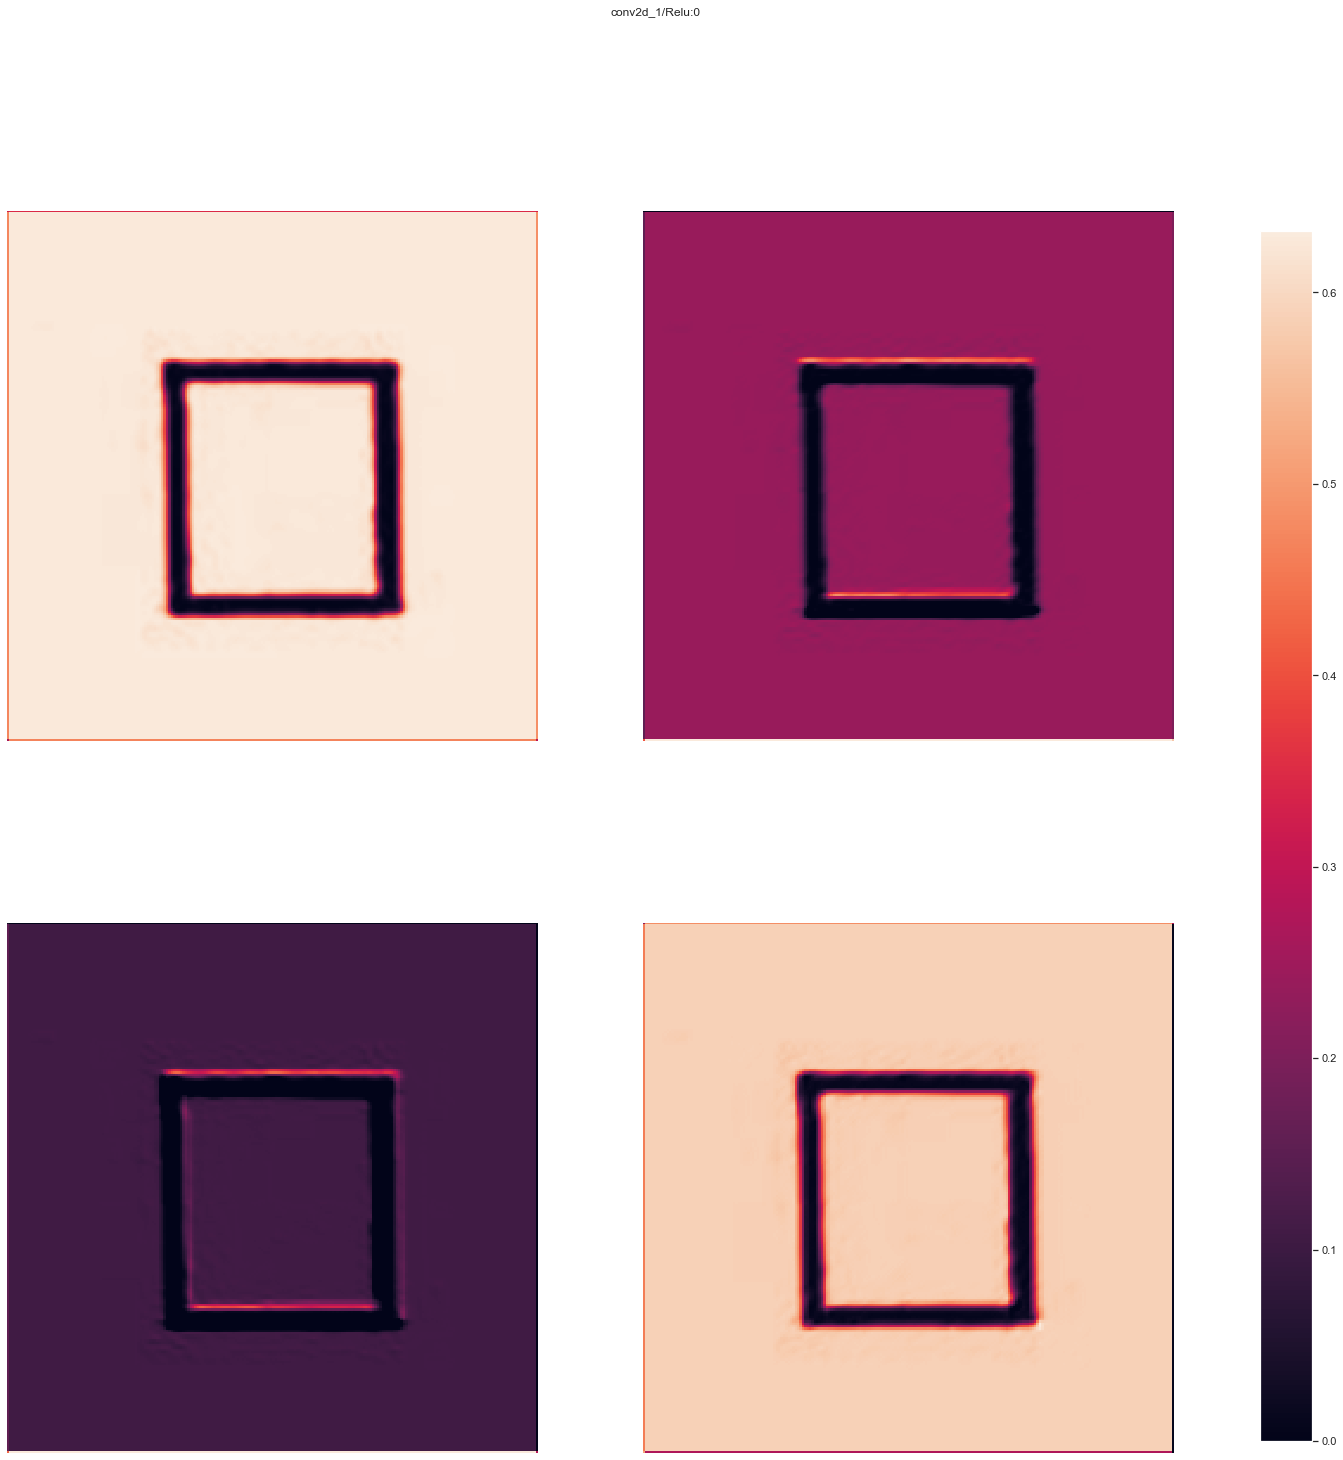

conv2d_2/Relu:0 (1, 112, 112, 4) 


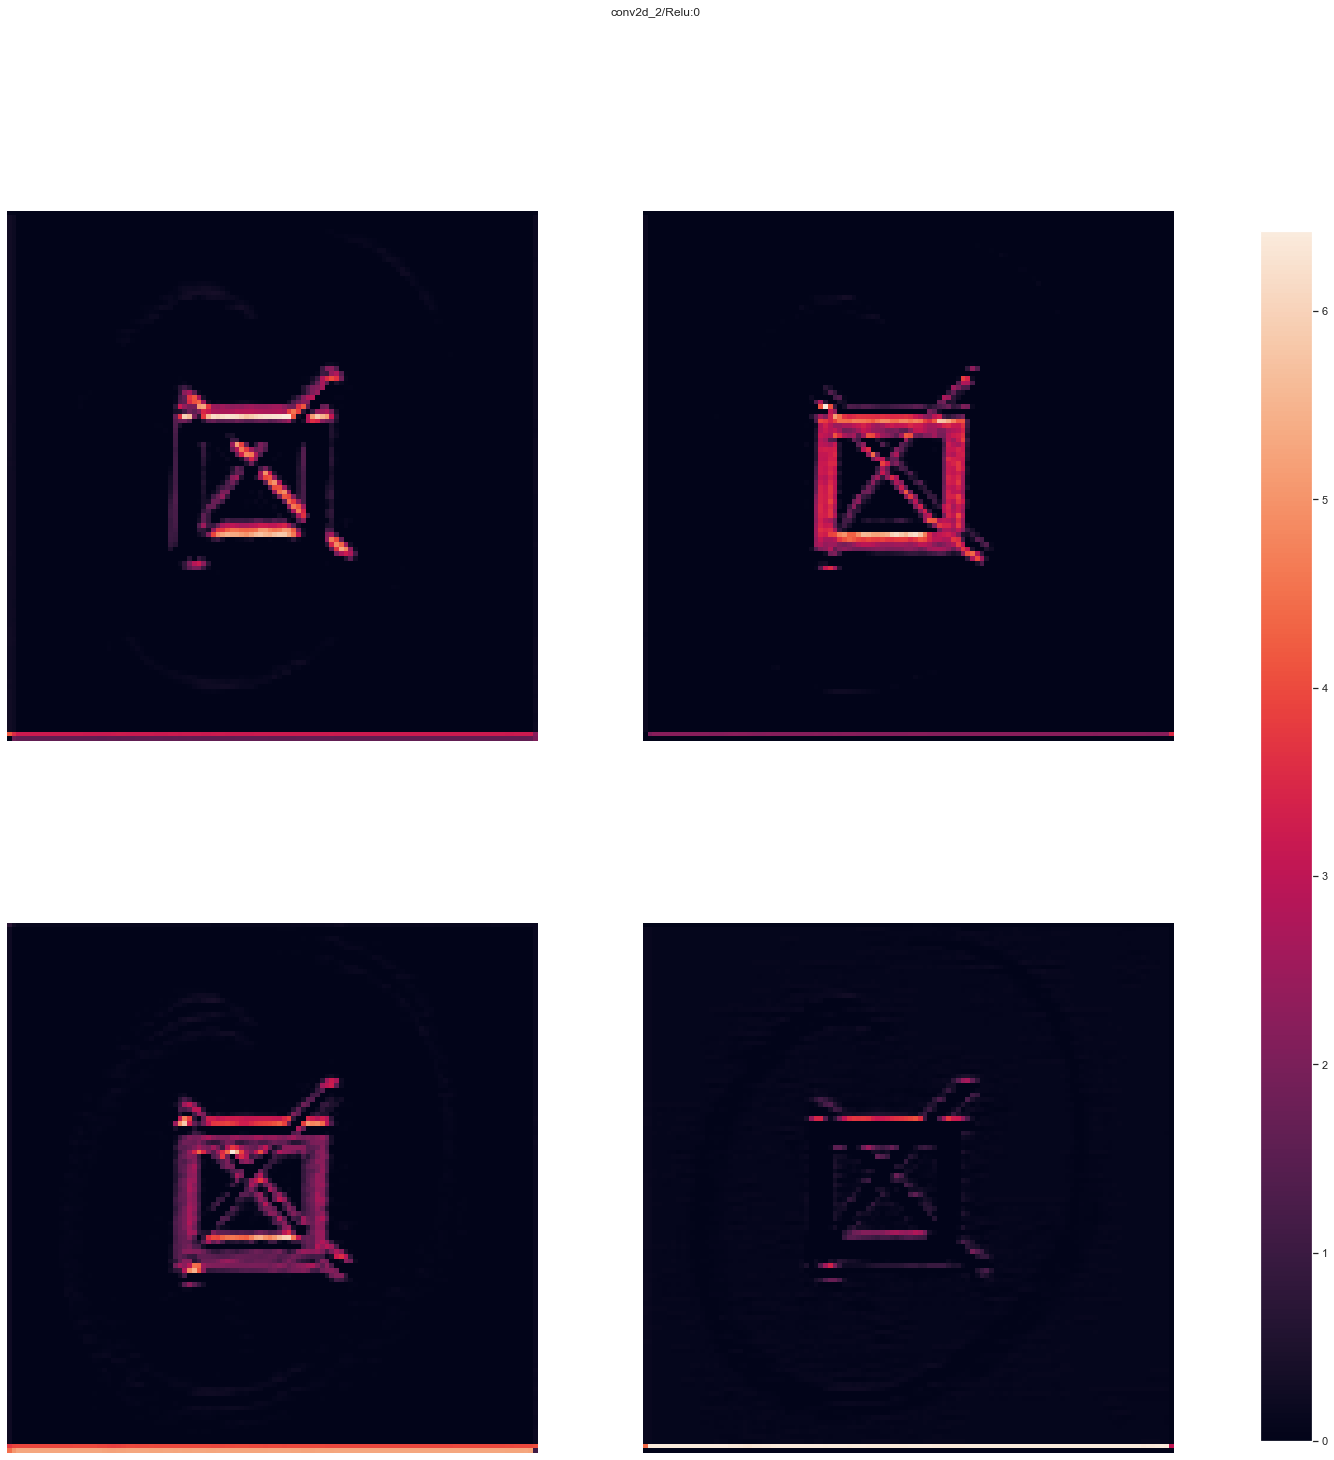

conv2d_2/Relu:0 (1, 112, 112, 4) 


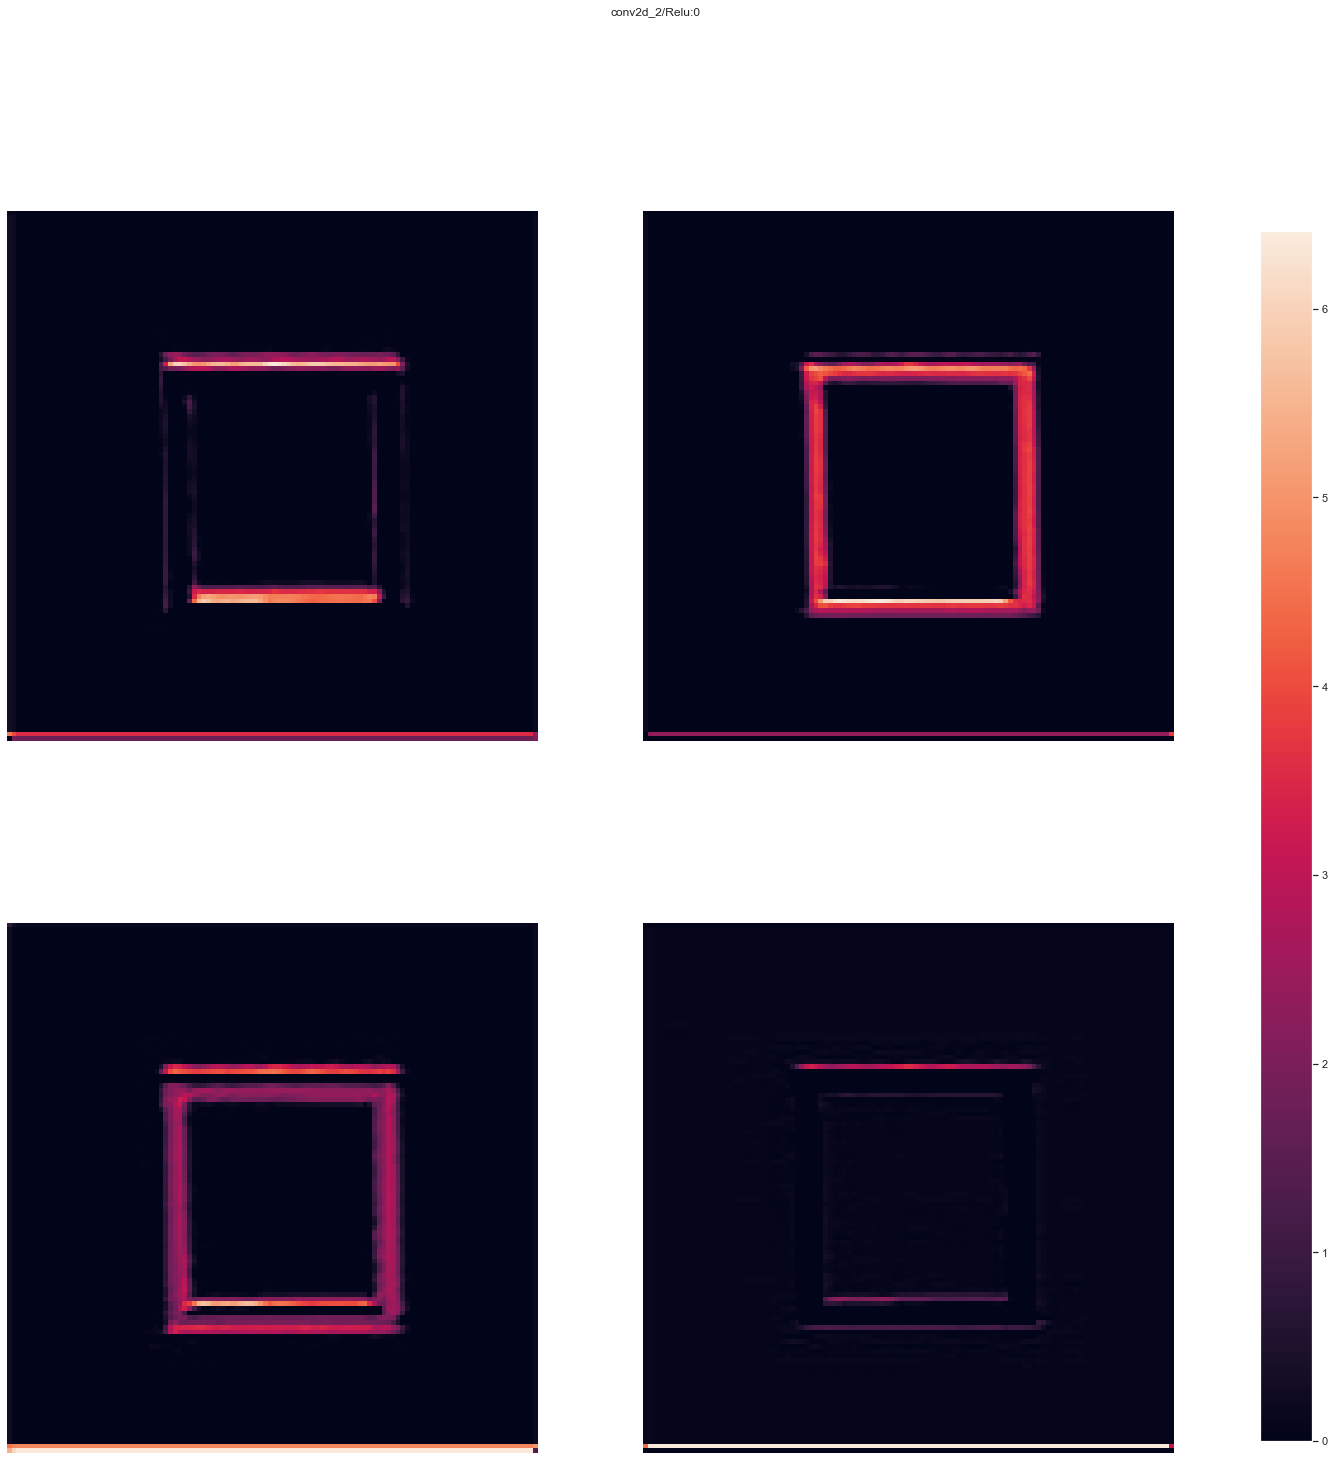

conv2d_3/Relu:0 (1, 56, 56, 8) 


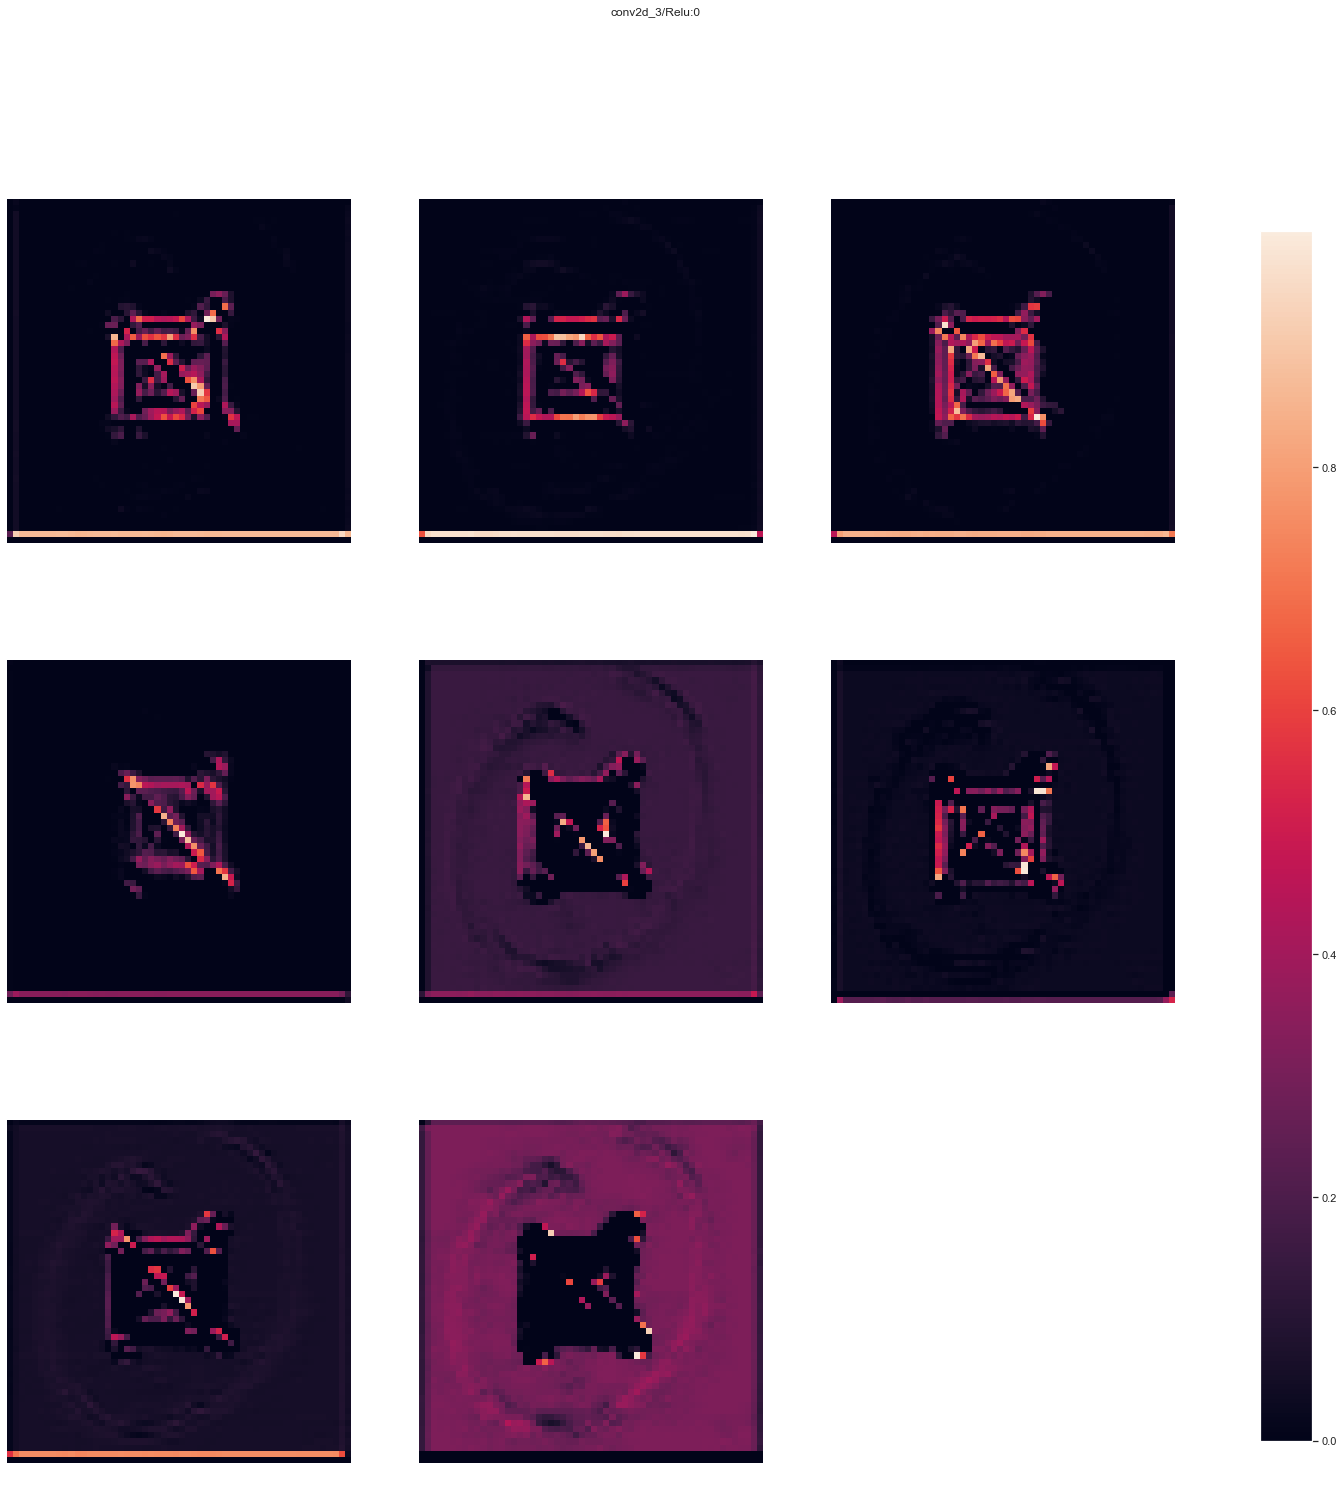

conv2d_3/Relu:0 (1, 56, 56, 8) 


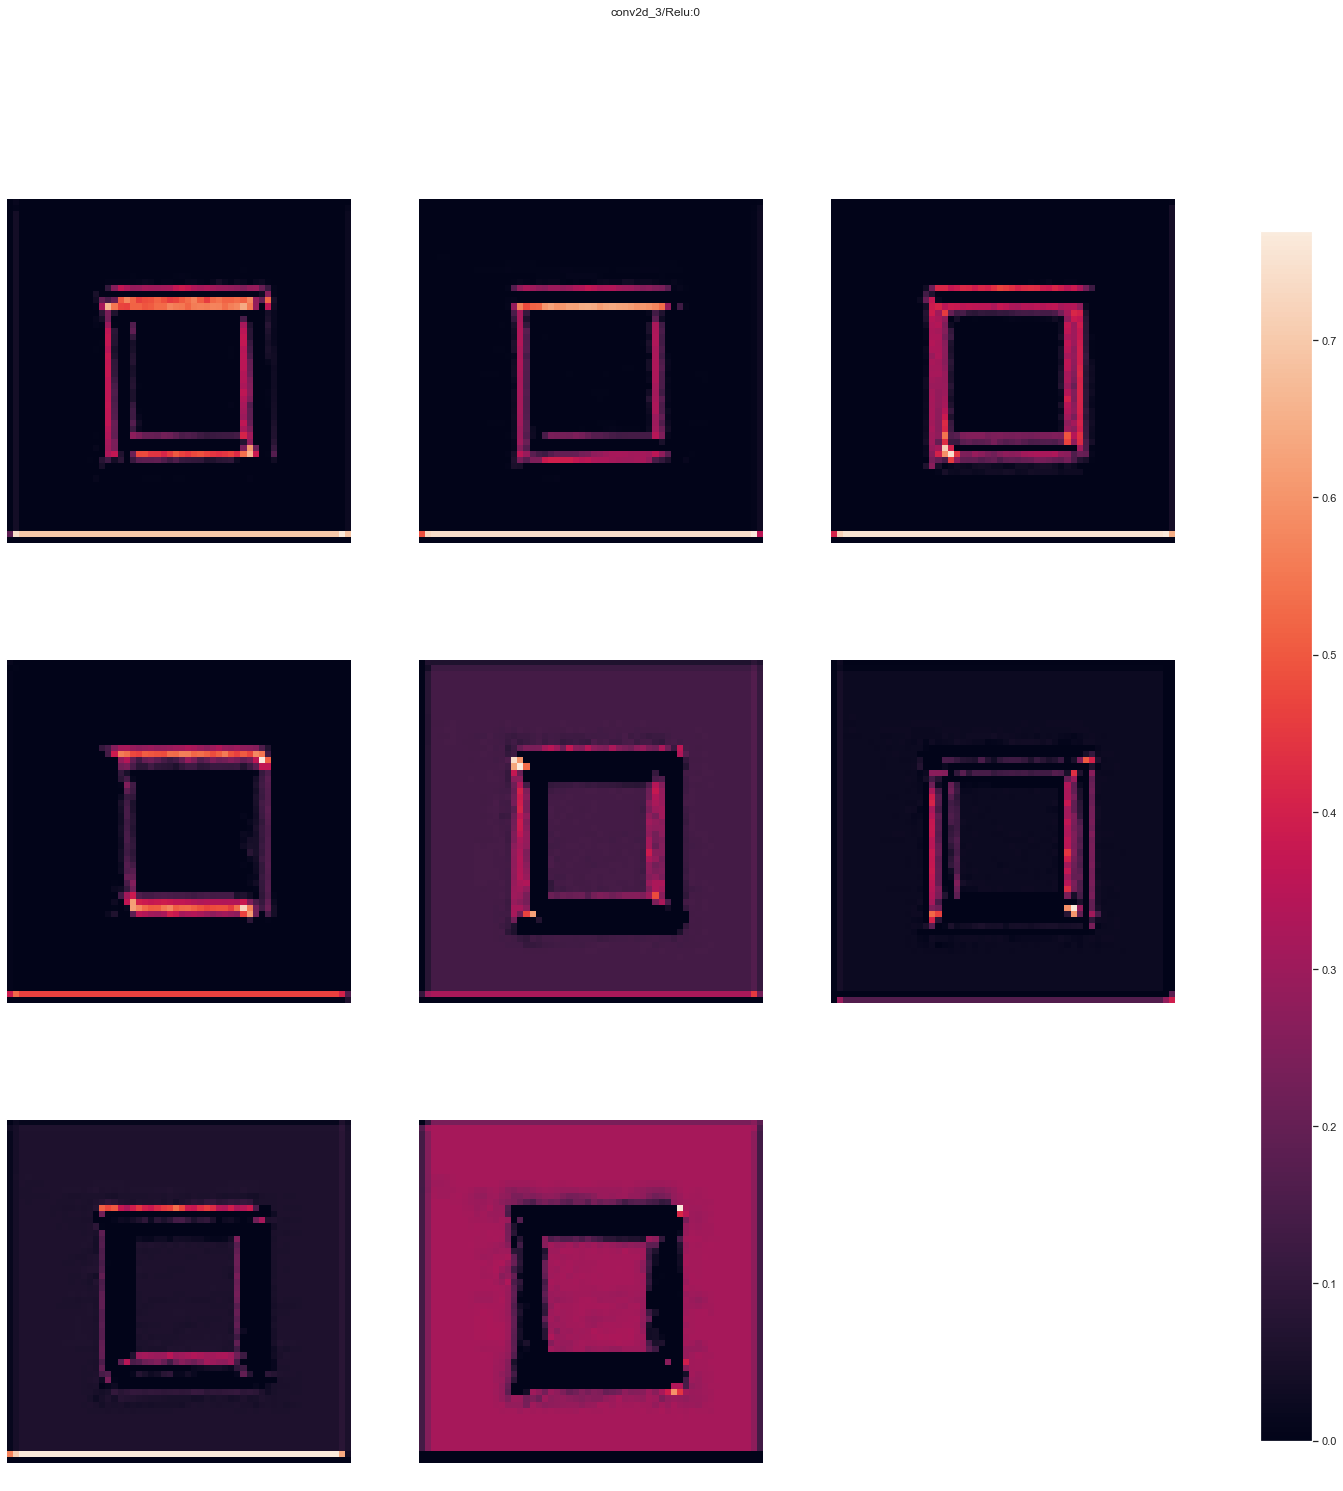

conv2d_4/Relu:0 (1, 28, 28, 8) 


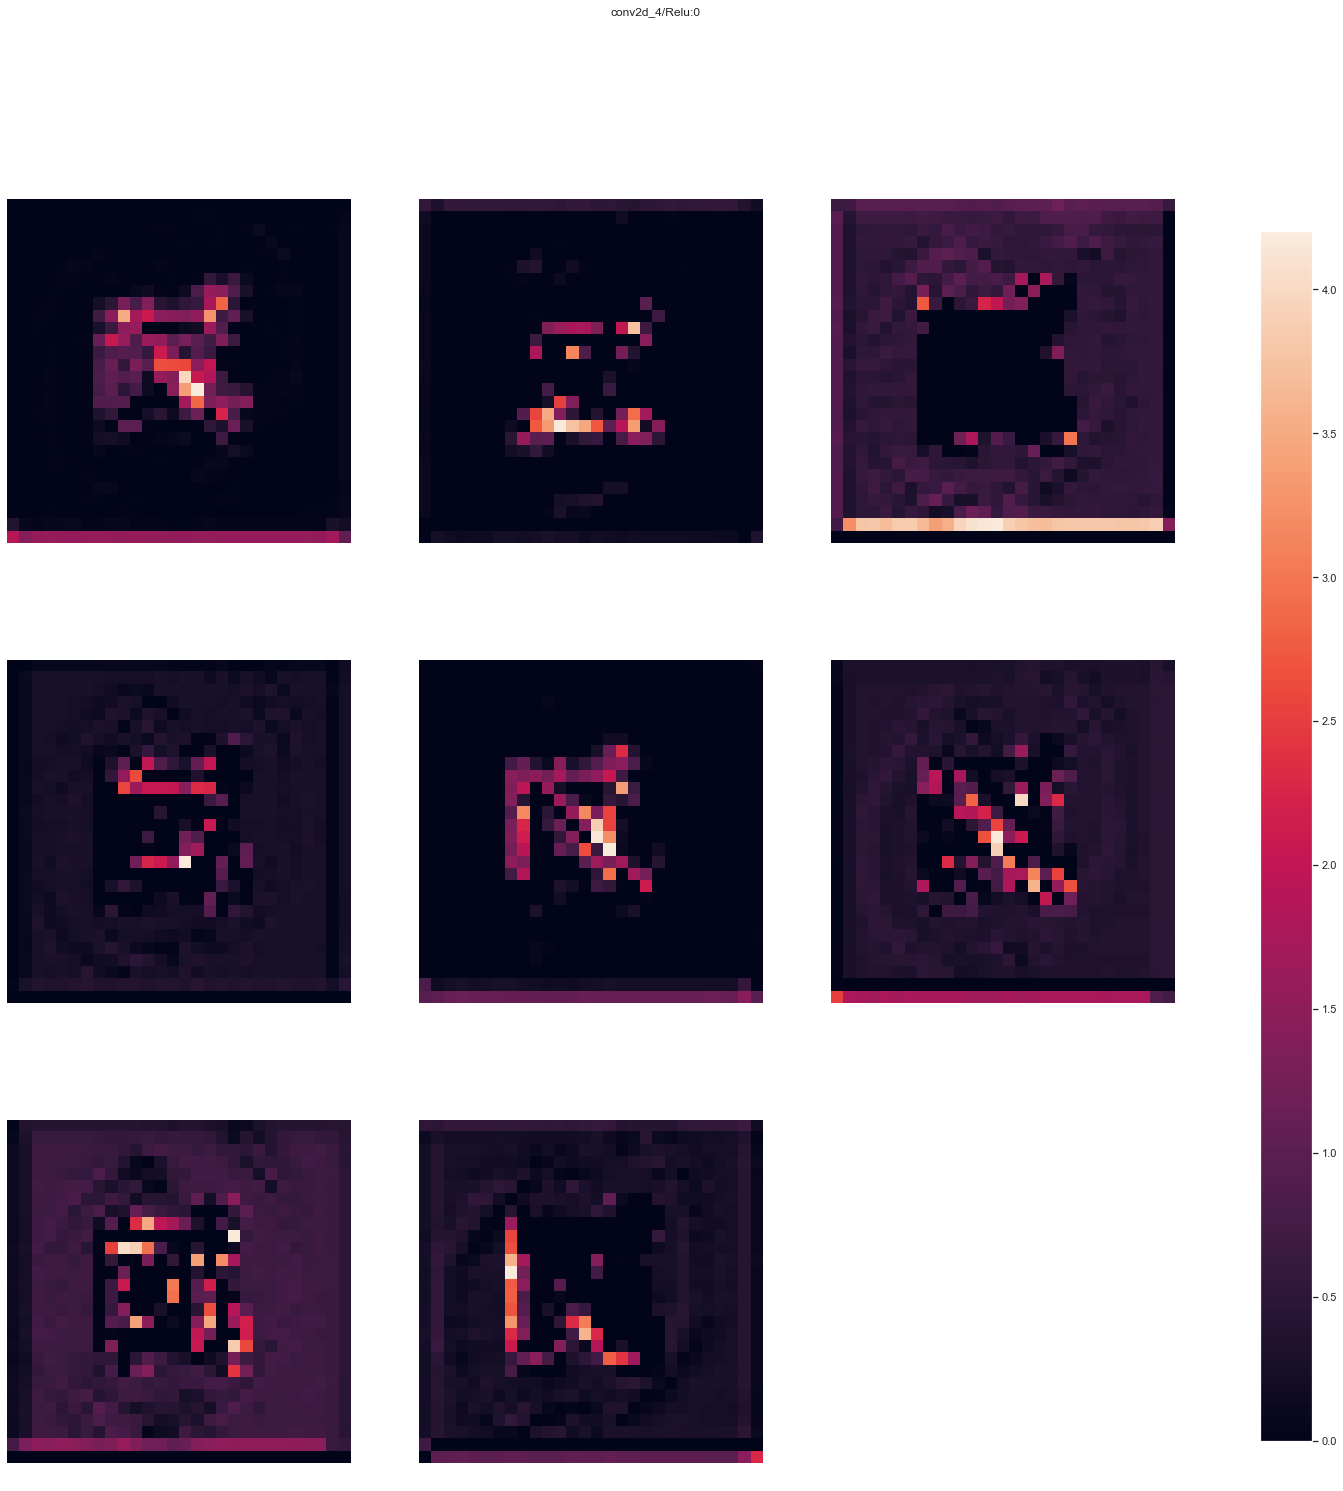

conv2d_4/Relu:0 (1, 28, 28, 8) 


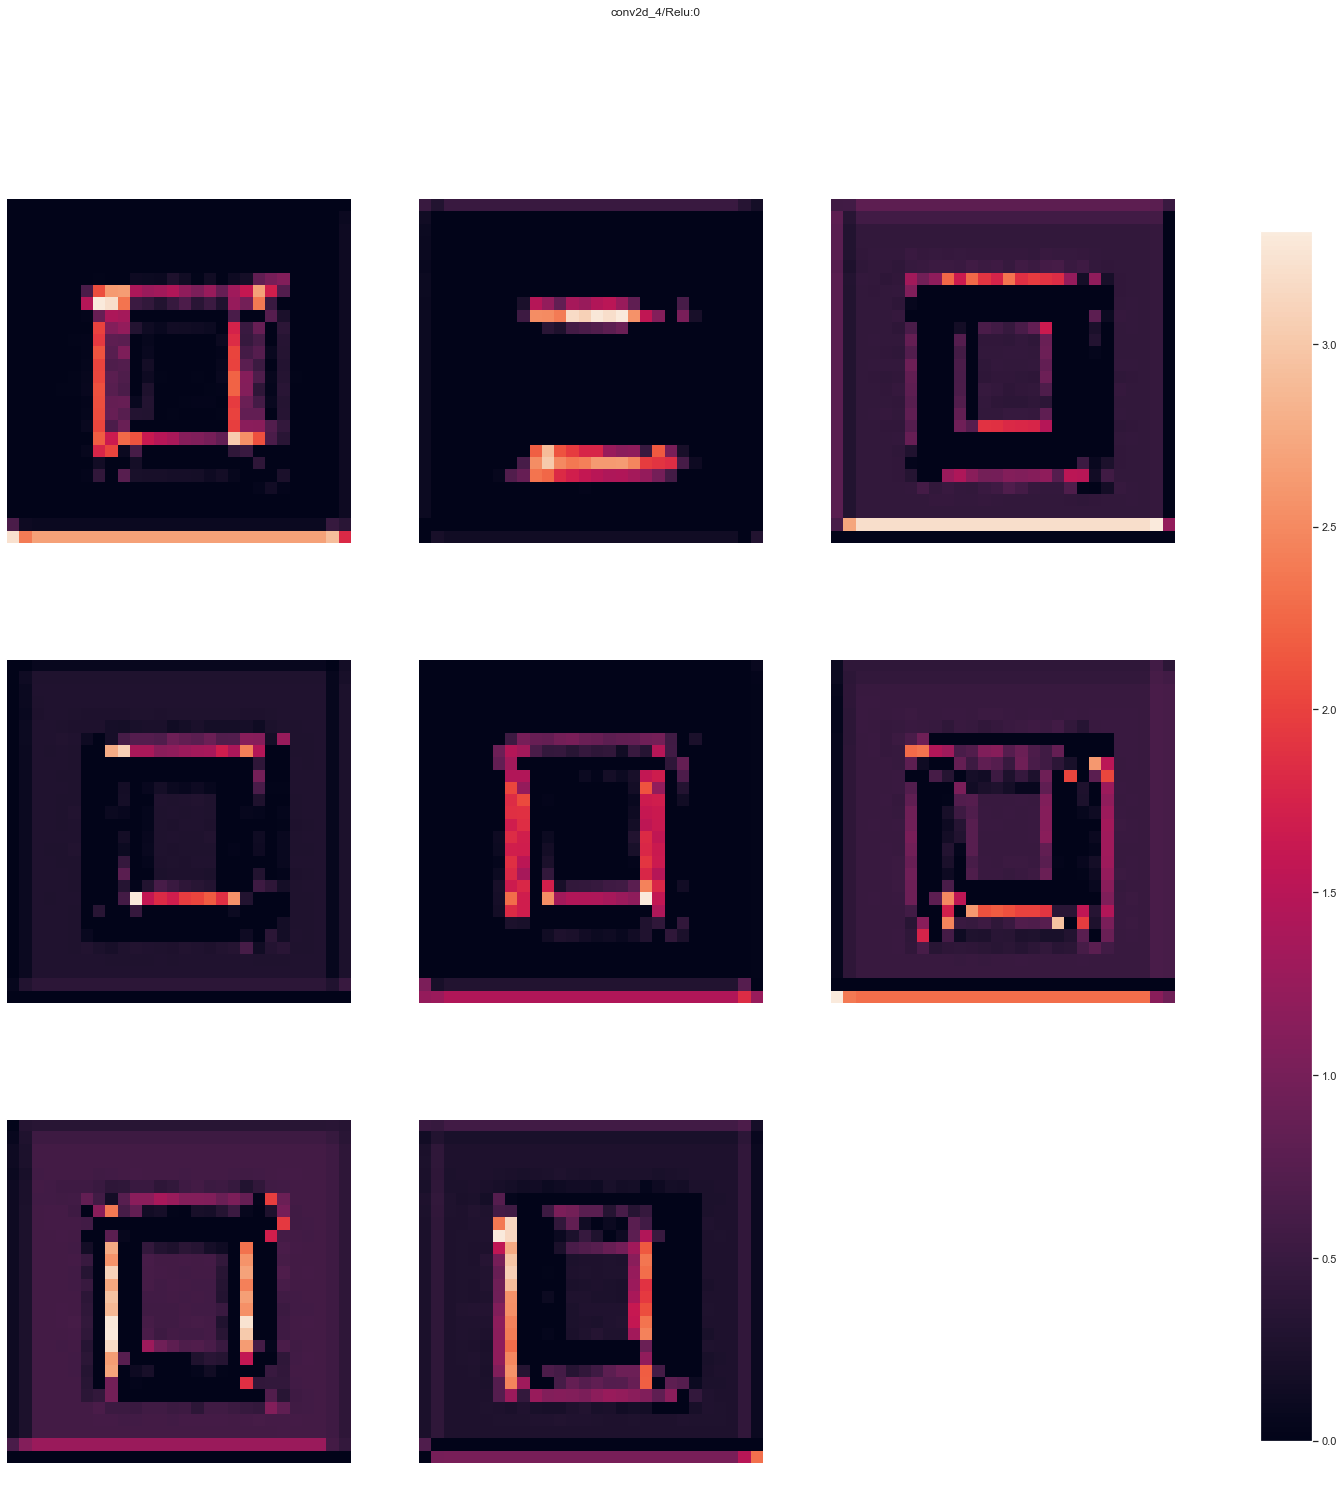

conv2d_5/Relu:0 (1, 14, 14, 16) 


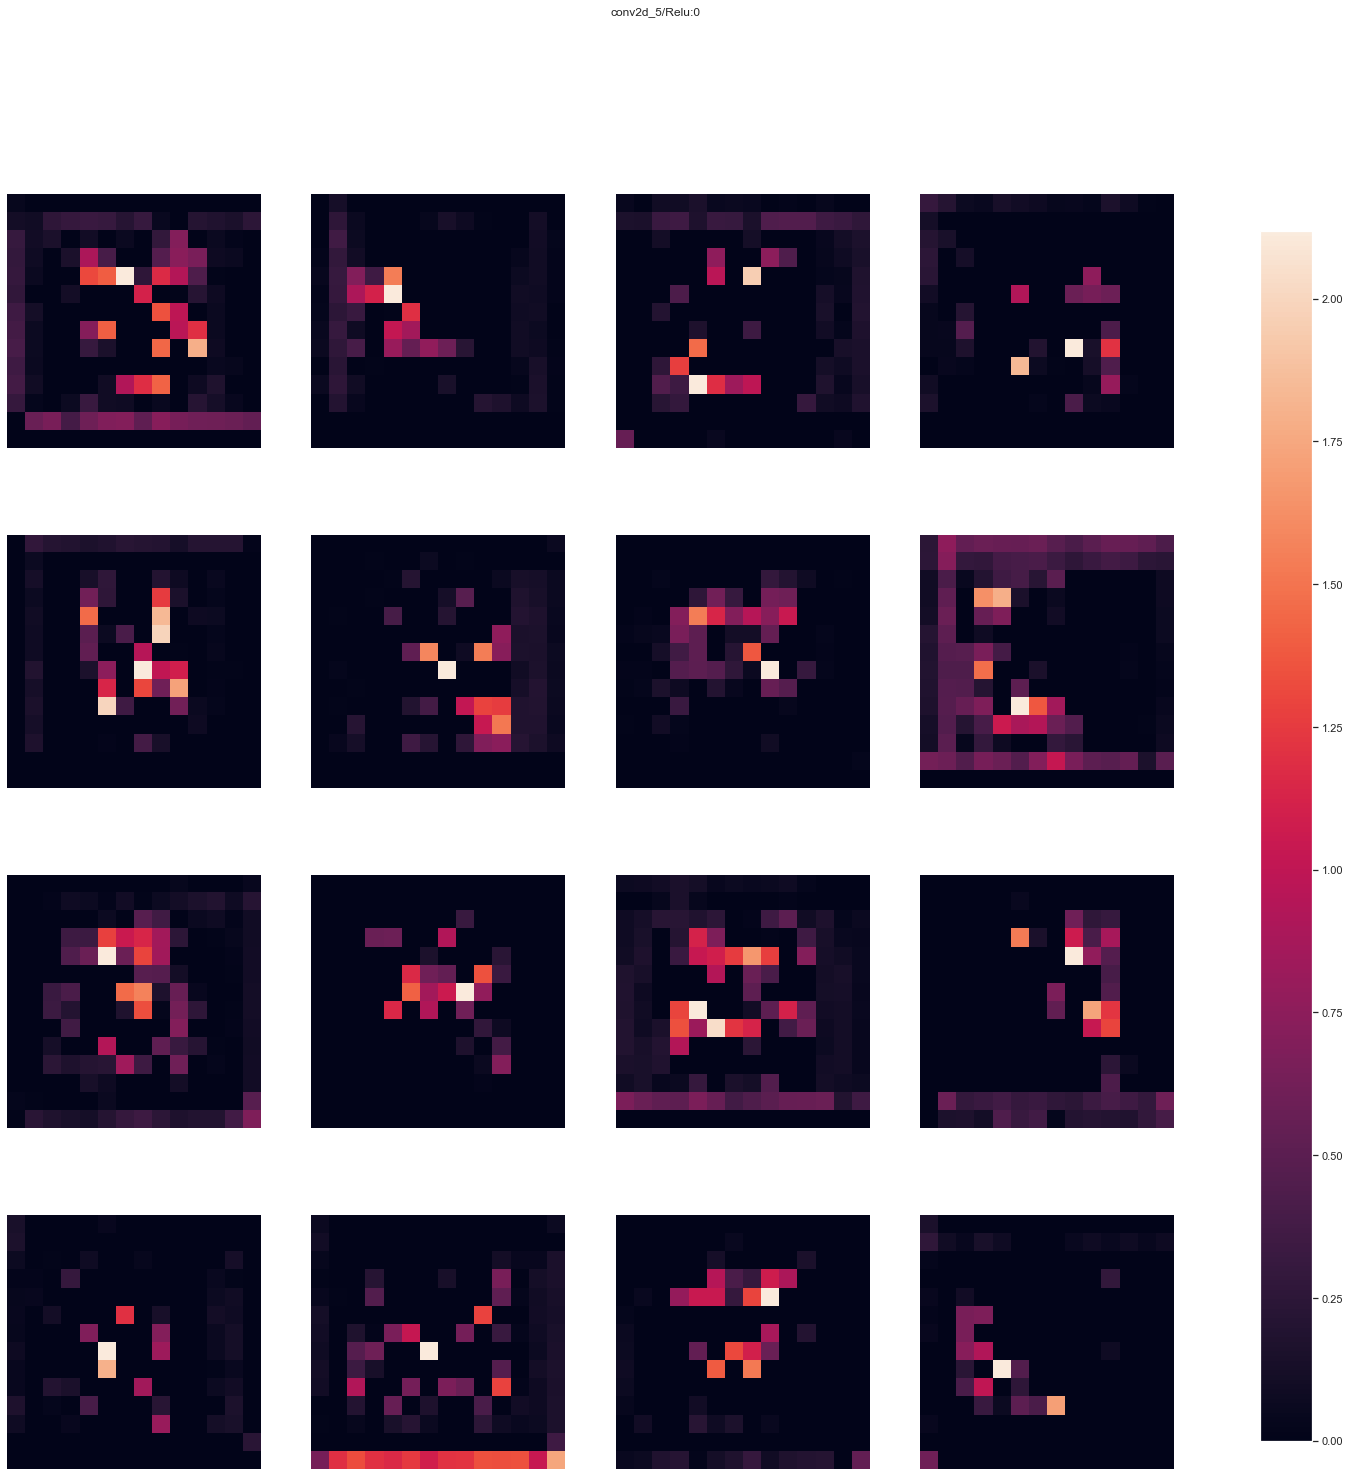

conv2d_5/Relu:0 (1, 14, 14, 16) 


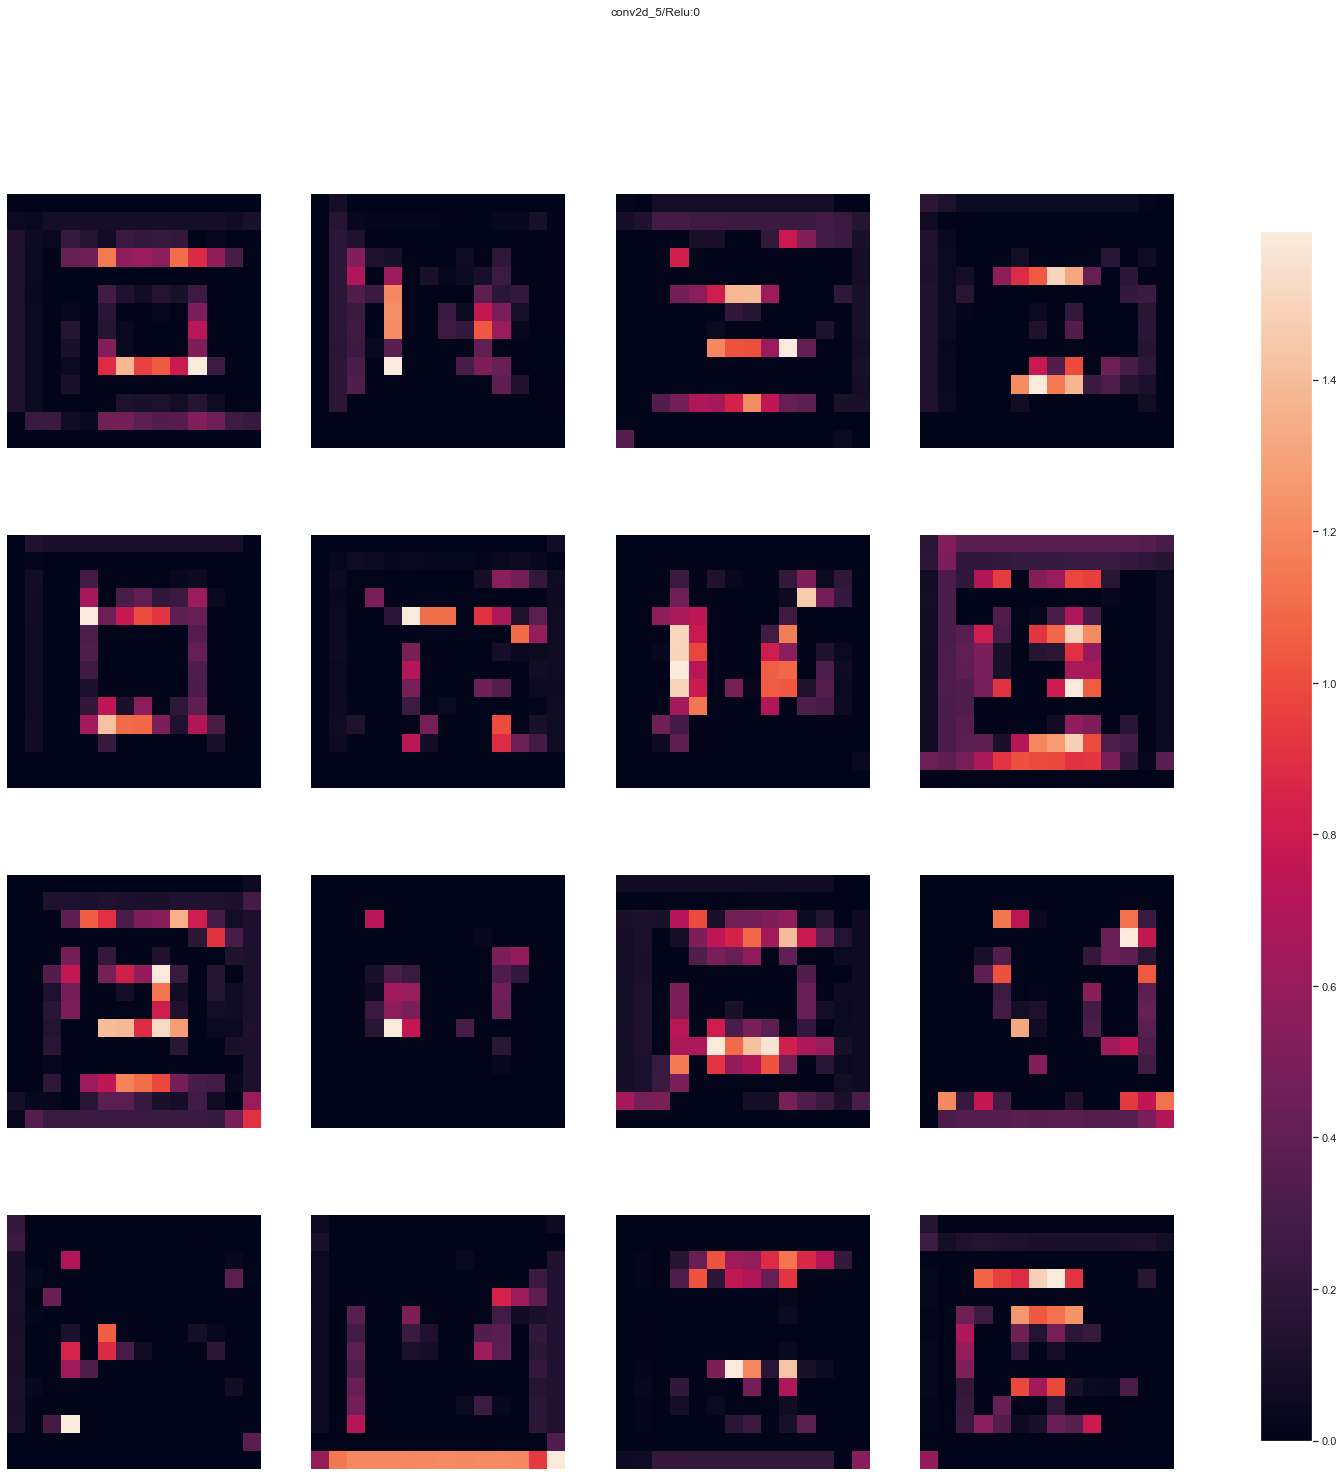

conv2d_6/Relu:0 (1, 7, 7, 16) 


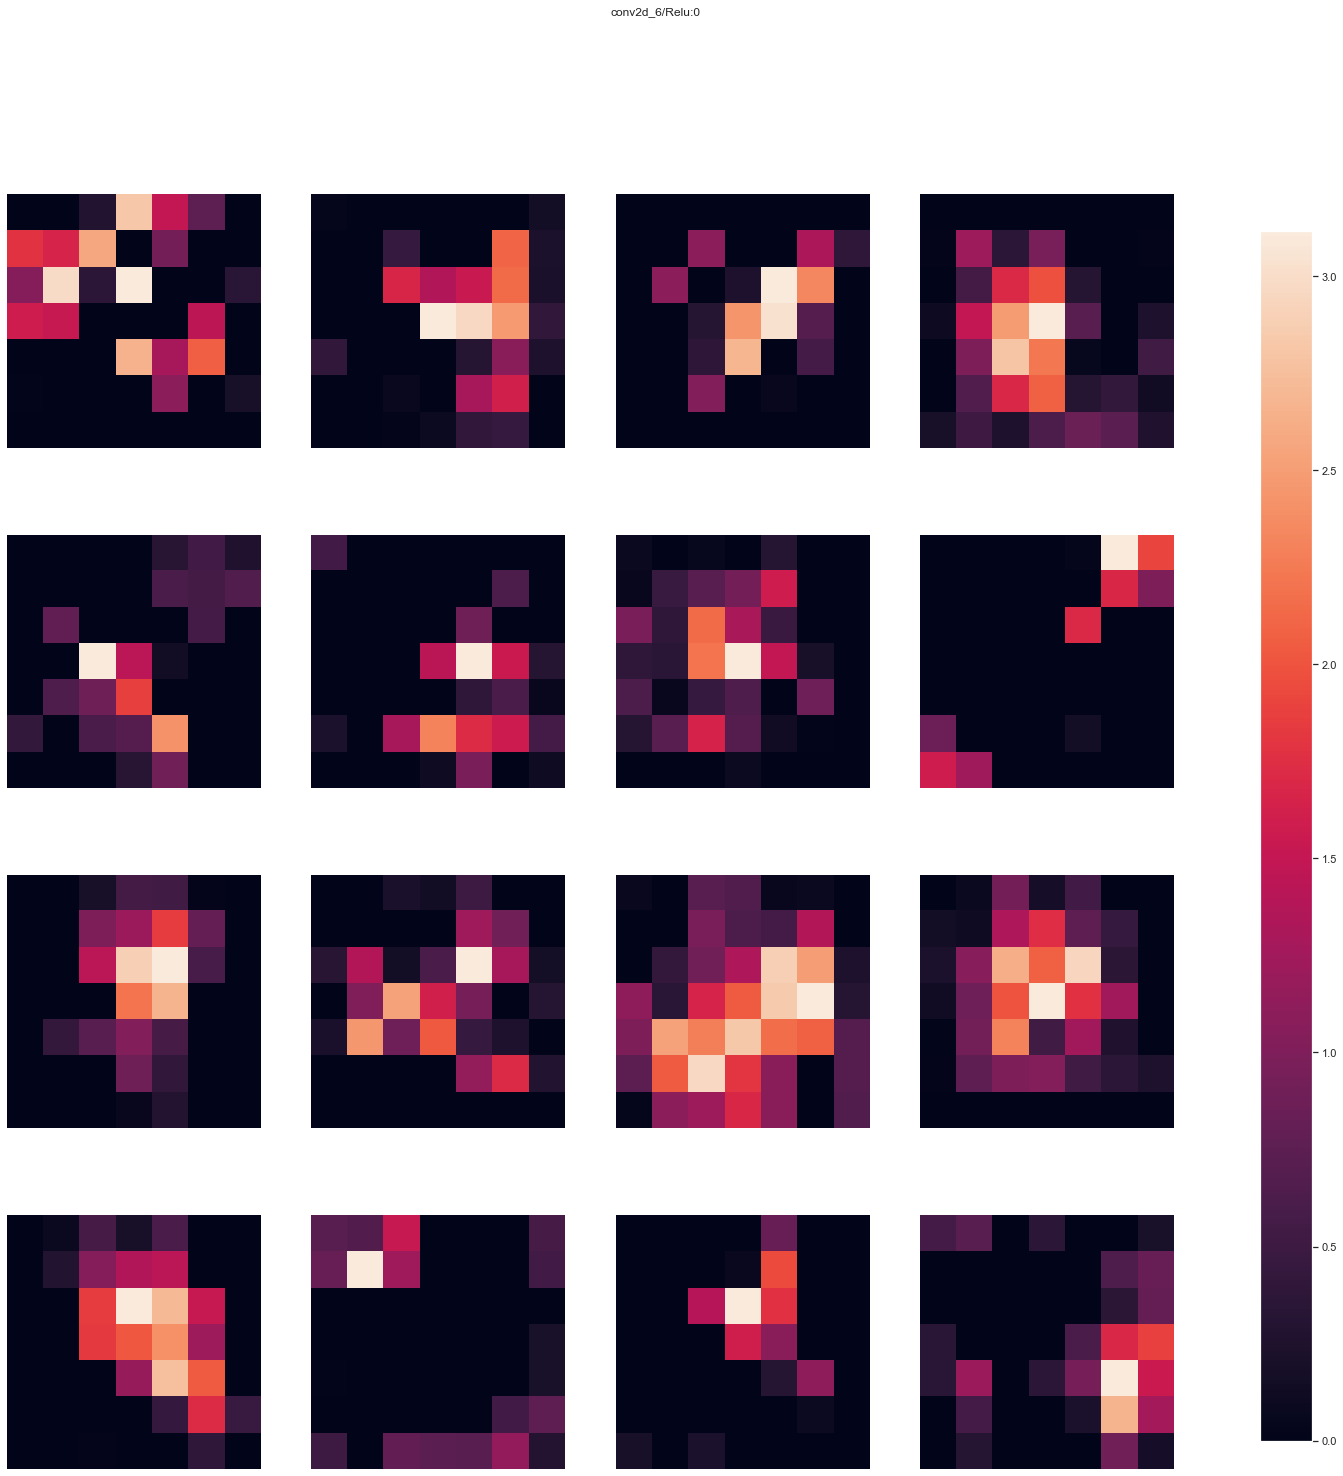

conv2d_6/Relu:0 (1, 7, 7, 16) 


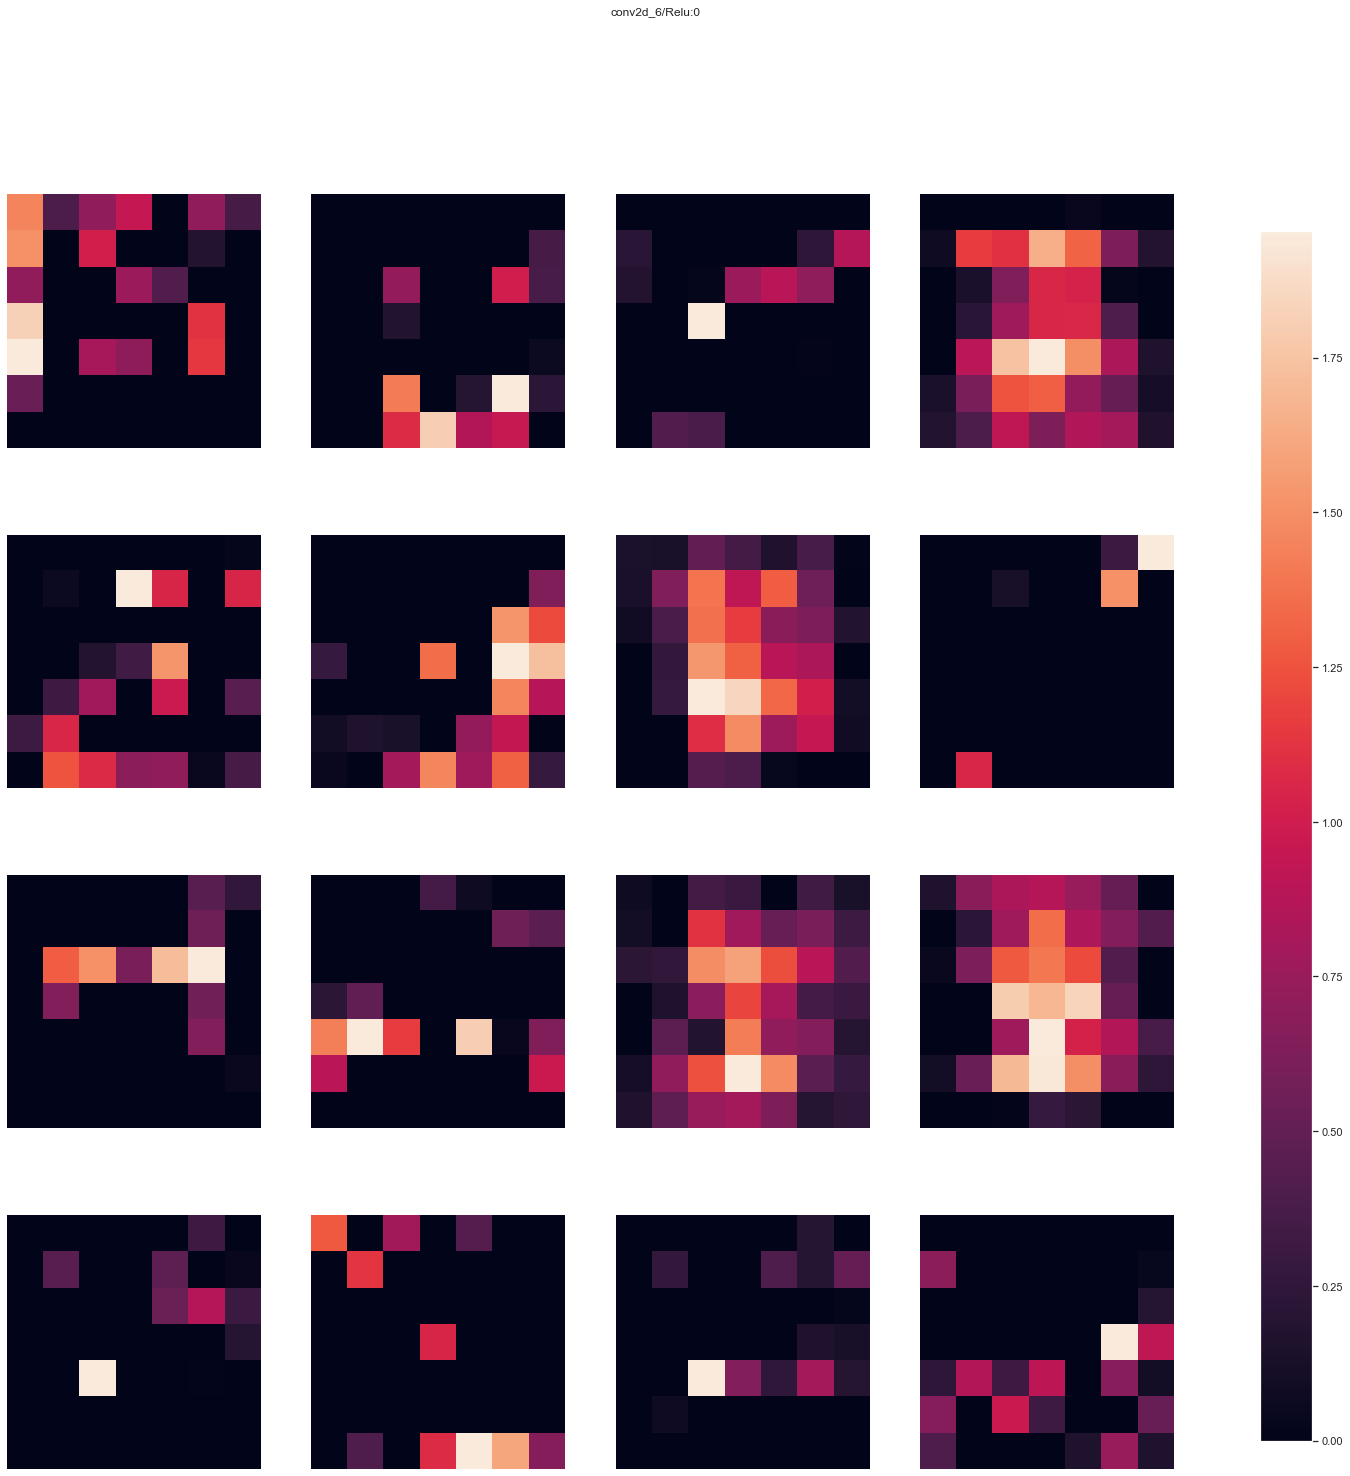

global_average_pooling2d_1/Mean:0 (1, 16) 


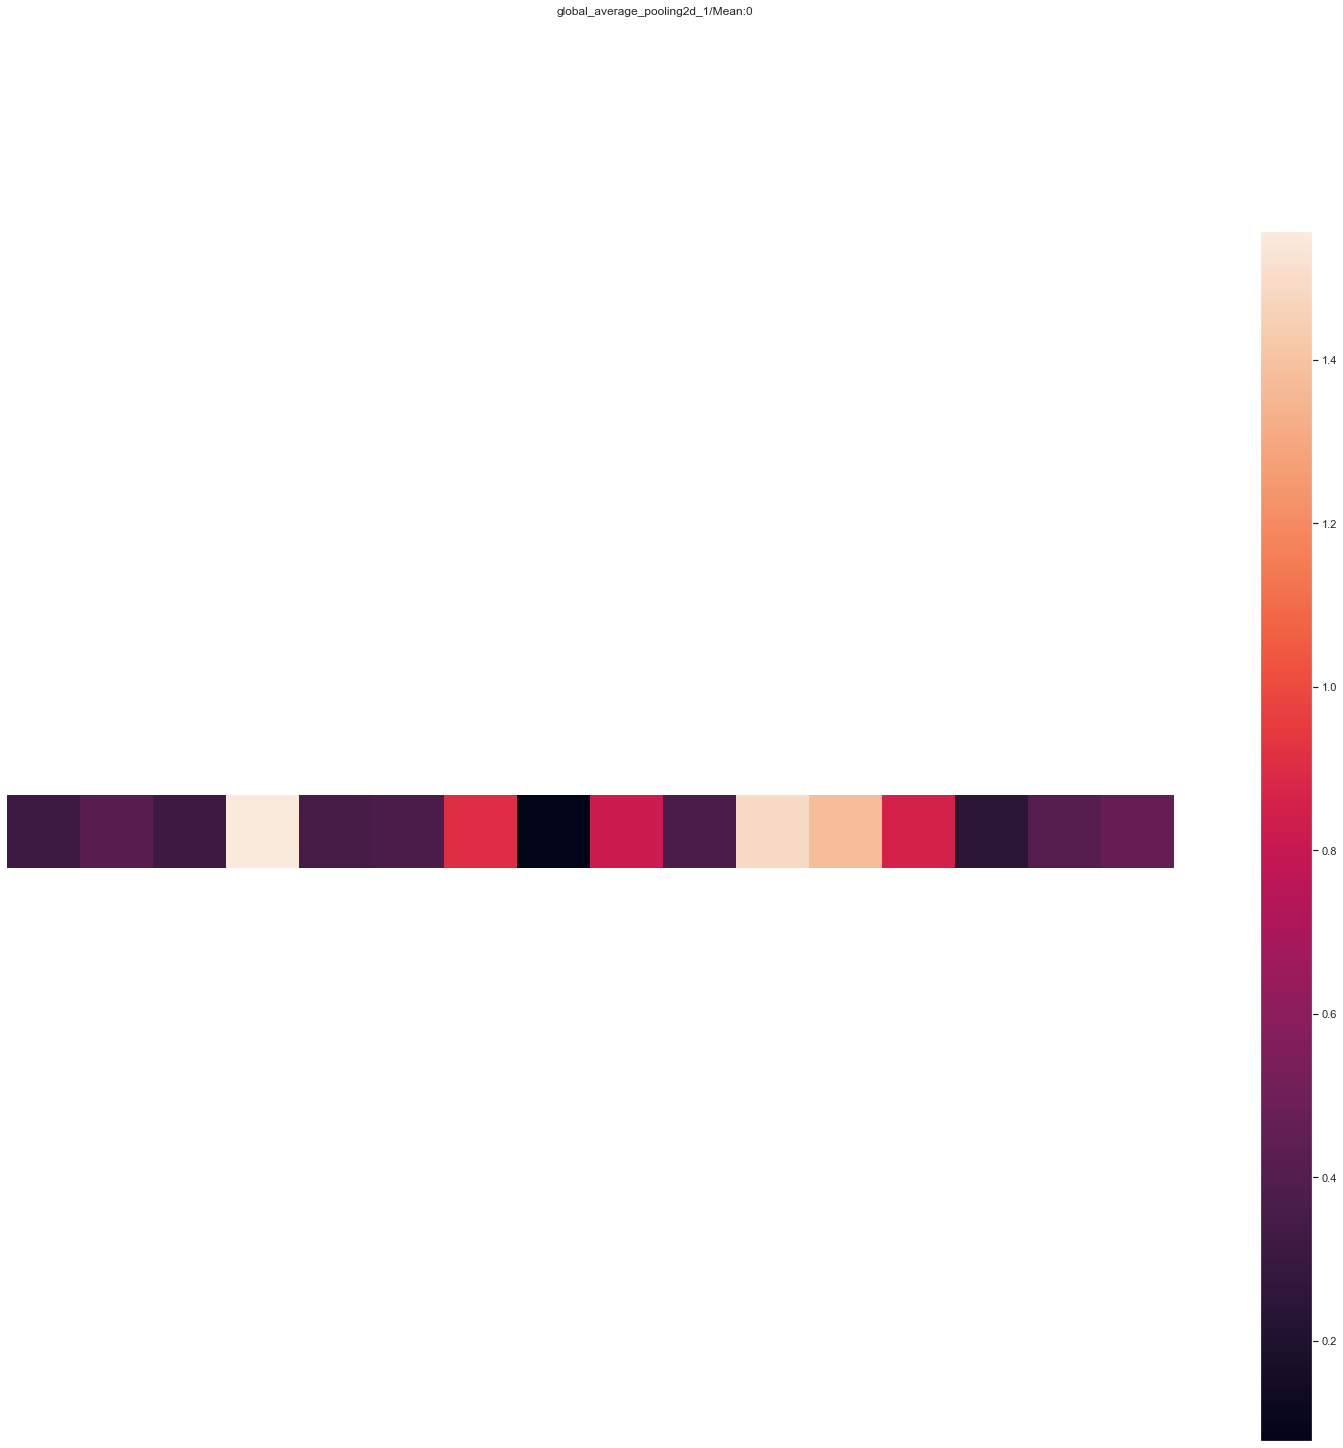

global_average_pooling2d_1/Mean:0 (1, 16) 


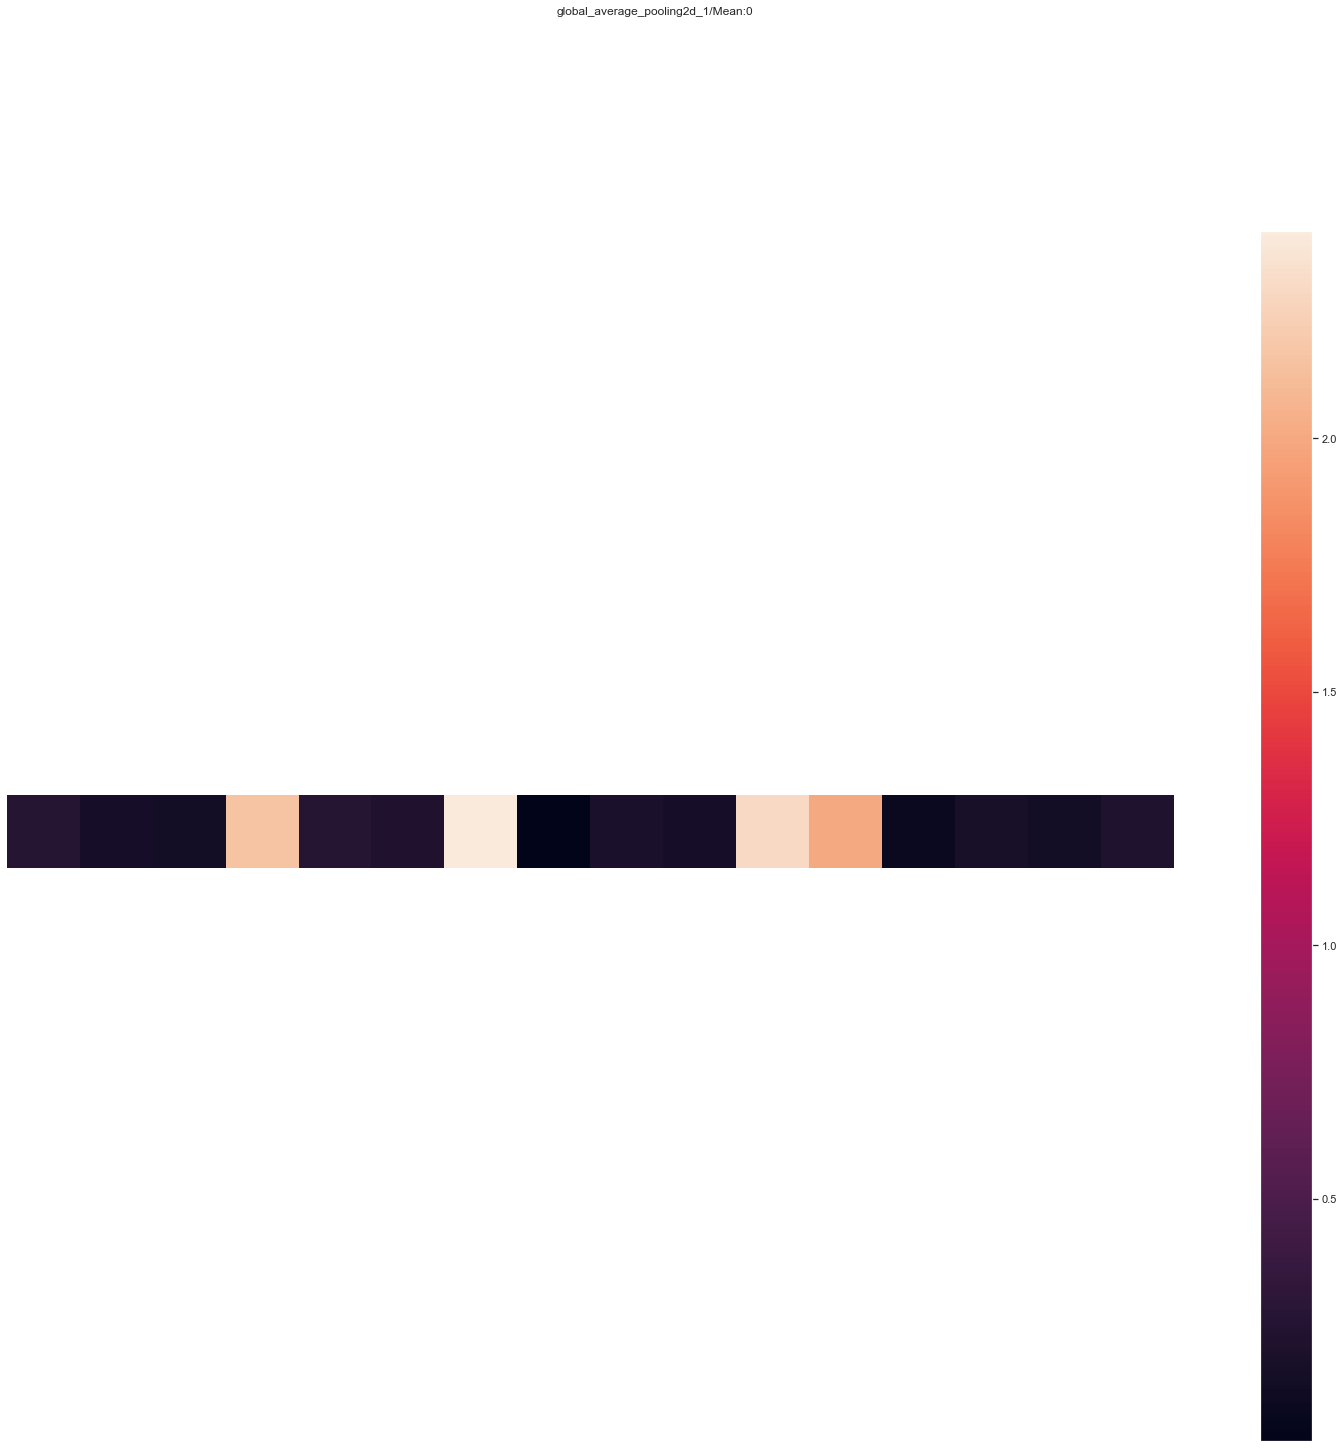

dense_1/Softmax:0 (1, 2) 


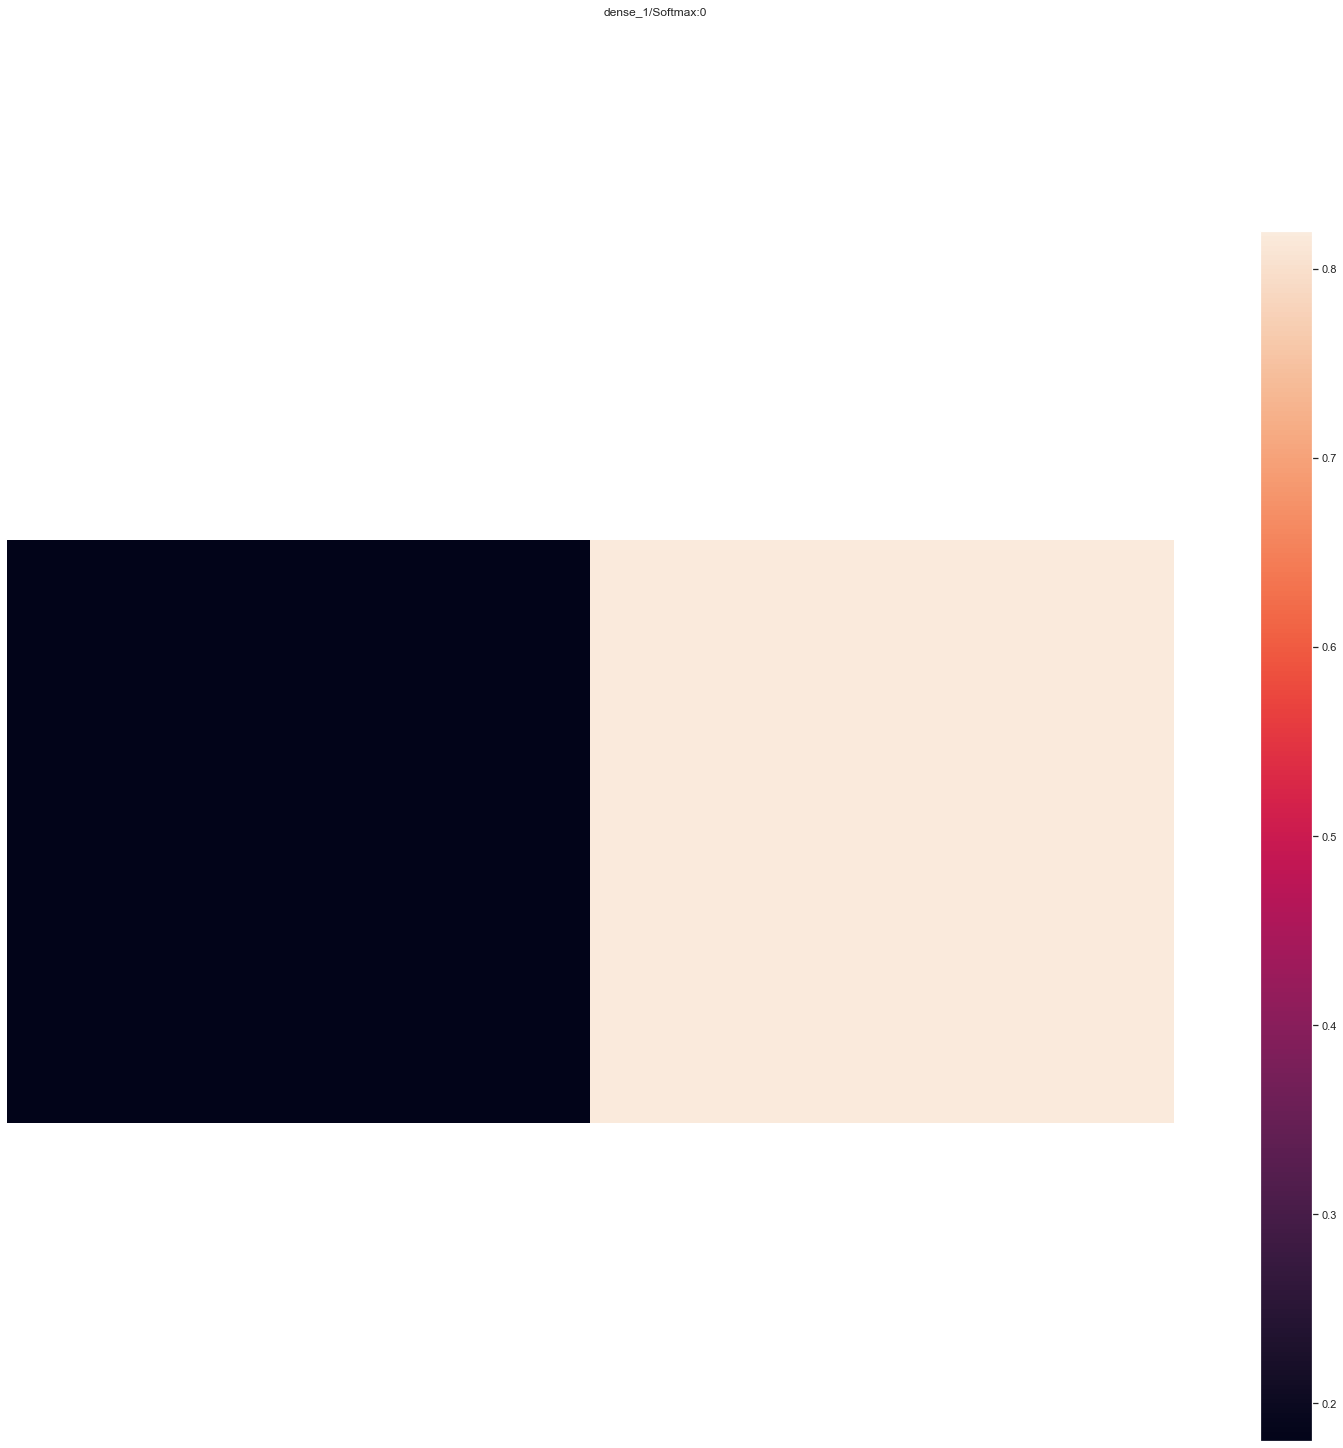

dense_1/Softmax:0 (1, 2) 


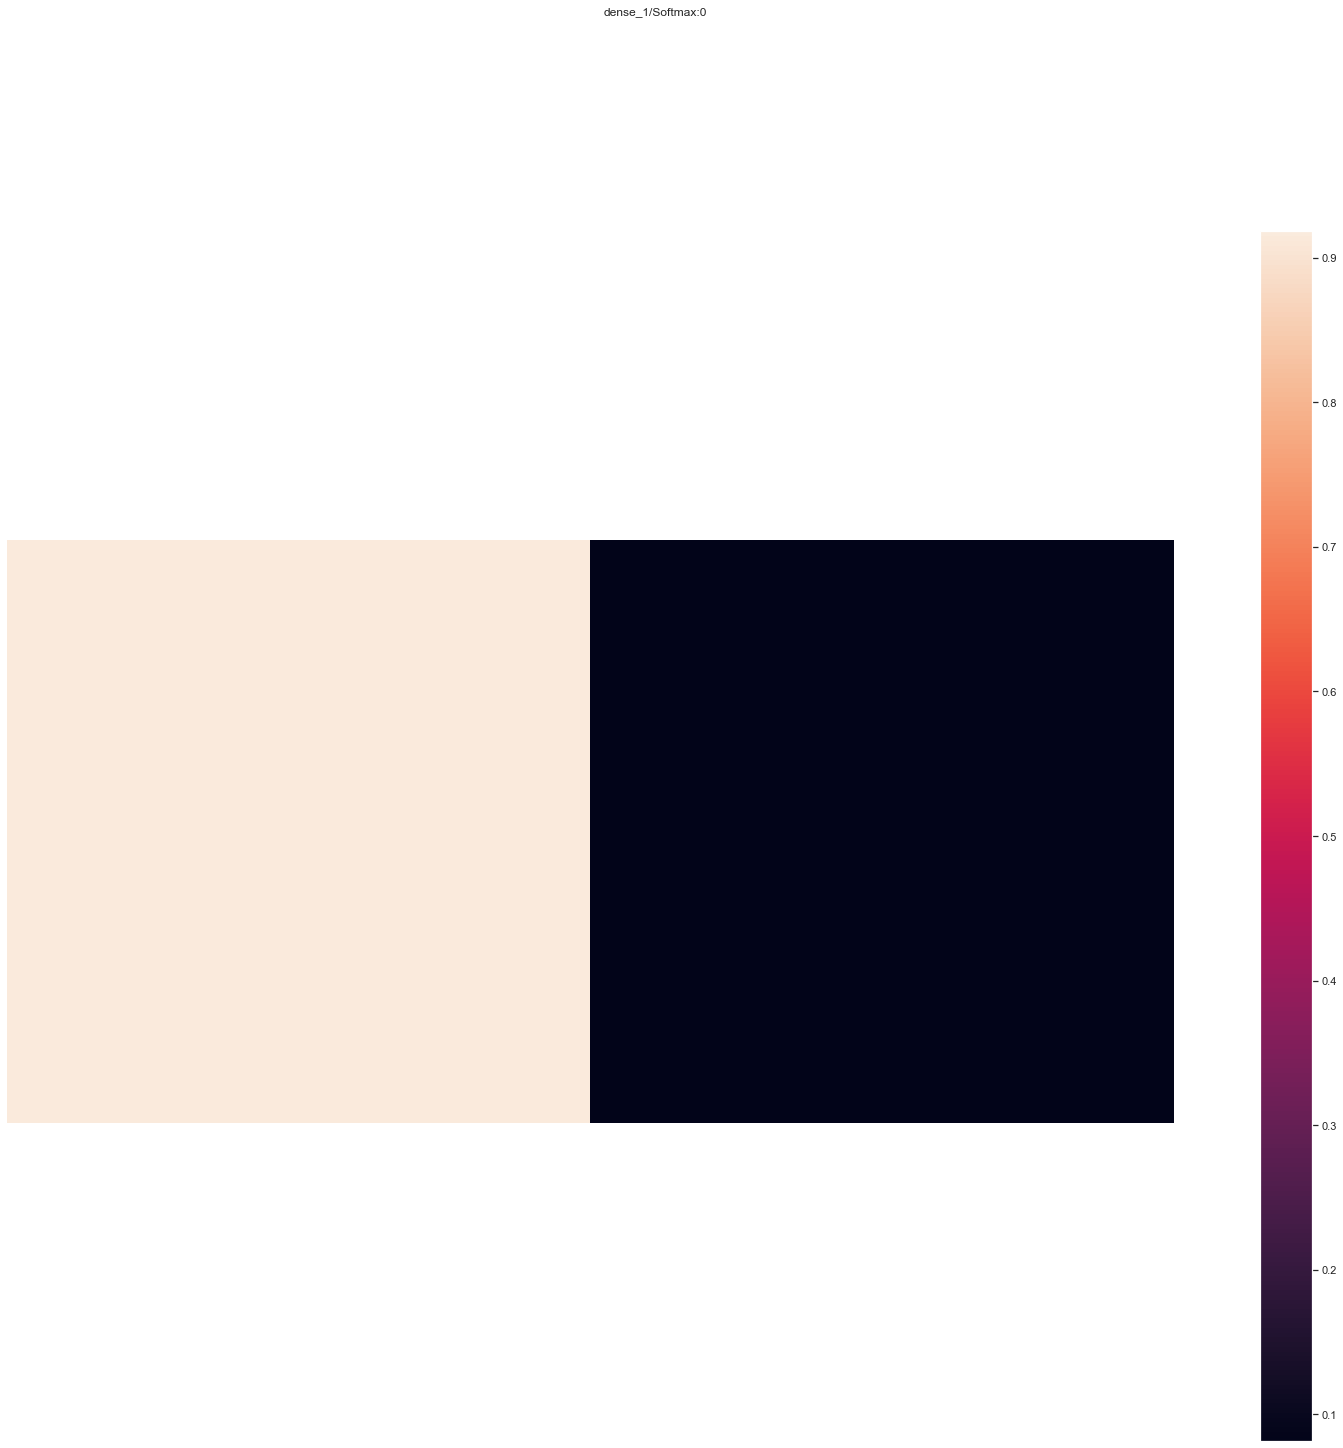

In [35]:
from keract import get_activations, display_activations

test_sample_1 = np.expand_dims(x_test[25], axis=0)
test_sample_2 = np.expand_dims(x_test[26], axis=0)

feature_maps = ["conv2d_1","conv2d_2","conv2d_3","conv2d_4","conv2d_5","conv2d_6","global_average_pooling2d_1", "dense_1"]
for fm in feature_maps:
    activations_1 = get_activations(model, test_sample_1, fm)                                   
    display_activations(activations_1)
    
    activations_2 = get_activations(model, test_sample_2, fm)                                   
    display_activations(activations_2)

## Analyze the dataset using the feature vector (embedding) of the model

### Define a new model and get the embedding

In [31]:
from keras import Model
emb_model = Model(inputs=model.input,
                  outputs=model.get_layer("global_average_pooling2d_1").output)
embeddings = emb_model.predict(x_test)
emb_cols = range(embeddings.shape[1])
emb_cols = ["E" + str(nr) for nr in emb_cols]
embeddings_df = pd.DataFrame(embeddings, columns = emb_cols)
print(embeddings.shape)
embeddings_df.head(10)

(152, 16)


E0        E1        E2        E3        E4        E5        E6  \
0  0.780415  2.641551  1.284989  4.003628  1.138456  0.104082  1.526090   
1  0.483935  2.355174  0.426747  2.605975  0.124992  0.242197  0.774226   
2  0.309436  2.272908  0.361203  2.240503  0.026671  0.108802  0.689072   
3  0.703624  1.578654  0.778159  2.098885  0.651840  0.078893  1.193544   
4  0.249220  1.339913  0.266240  1.441269  0.083441  0.140096  0.592723   
5  0.463342  1.327745  0.909763  1.697900  0.483340  0.083757  1.157153   
6  0.358363  2.217243  0.357449  2.272197  0.051047  0.128049  0.633824   
7  0.584426  2.984680  1.017887  3.551661  0.581333  0.077691  1.199482   
8  0.364003  1.699549  0.353485  1.884397  0.082349  0.225578  0.594028   
9  0.424659  1.889033  0.343723  2.049908  0.081881  0.309427  0.663924   

         E7        E8        E9       E10       E11       E12       E13  \
0  0.727065  4.813869  1.173983  0.919701  0.086133  1.536135  4.033961   
1  0.417515  3.946472  0.532174  0.274543  0.318019  0.691917  2.664667   
2  0.373975  3.555161  0.395463  0.192239  0.353745  0.735816  2.288359   
3  0.748854  2.818525  0.913635  0.478122  0.155361  1.159557  2.406673   
4  0.513435  2.464442  0.323017  0.102839  0.355268  0.591942  1.866668   
5  0.656607  2.201896  0.919912  0.482930  0.199458  1.183209  1.917392   
6  0.372325  3.415304  0.423275  0.188105  0.370165  0.726578  2.347092   
7  0.478998  4.676262  1.074215  0.654491  0.157051  1.395873  3.452557   
8  0.403730  2.881207  0.383192  0.309141  0.421882  0.548189  2.020453   
9  0.397312  3.217151  0.435717  0.296112  0.430759  0.572662  2.232811   

        E14       E15  
0  0.259469  0.835754  
1  0.312985  0.336169  
2  0.276805  0.252890  
3  0.281395  0.734782  
4  0.223640  0.156208  
5  0.352859  0.532803  
6  0.210019  0.264005  
7  0.435715  0.840178  
8  0.282075  0.206379  
9  0.225555  0.285482

In [32]:
from sklearn.manifold import TSNE
tsne_function = TSNE(n_components=2, n_iter=400, n_iter_without_progress=300, random_state=1)
embeddings_tsne = tsne_function.fit_transform(embeddings_df)
embeddings_tsne_df = pd.DataFrame(embeddings_tsne, columns=["x1", "x2"])
embeddings_tsne_df.head()

x1        x2
0 -4.591090  7.501930
1  2.744634  6.573384
2  5.313988  4.154684
3 -0.177834 -3.471833
4  8.238296 -2.370583

In [33]:
embeddings_df["target"] = np.argmax(prob_pred, axis=1)
embeddings_df["pred"] = np.argmax(y_test, axis=1)

In [34]:
evaluation_dataset = pd.concat([embeddings_df,embeddings_tsne_df], axis=1)
evaluation_dataset.head(10)

E0        E1        E2        E3        E4        E5        E6  \
0  0.780415  2.641551  1.284989  4.003628  1.138456  0.104082  1.526090   
1  0.483935  2.355174  0.426747  2.605975  0.124992  0.242197  0.774226   
2  0.309436  2.272908  0.361203  2.240503  0.026671  0.108802  0.689072   
3  0.703624  1.578654  0.778159  2.098885  0.651840  0.078893  1.193544   
4  0.249220  1.339913  0.266240  1.441269  0.083441  0.140096  0.592723   
5  0.463342  1.327745  0.909763  1.697900  0.483340  0.083757  1.157153   
6  0.358363  2.217243  0.357449  2.272197  0.051047  0.128049  0.633824   
7  0.584426  2.984680  1.017887  3.551661  0.581333  0.077691  1.199482   
8  0.364003  1.699549  0.353485  1.884397  0.082349  0.225578  0.594028   
9  0.424659  1.889033  0.343723  2.049908  0.081881  0.309427  0.663924   

         E7        E8        E9       E10       E11       E12       E13  \
0  0.727065  4.813869  1.173983  0.919701  0.086133  1.536135  4.033961   
1  0.417515  3.946472  0.532174  0.274543  0.318019  0.691917  2.664667   
2  0.373975  3.555161  0.395463  0.192239  0.353745  0.735816  2.288359   
3  0.748854  2.818525  0.913635  0.478122  0.155361  1.159557  2.406673   
4  0.513435  2.464442  0.323017  0.102839  0.355268  0.591942  1.866668   
5  0.656607  2.201896  0.919912  0.482930  0.199458  1.183209  1.917392   
6  0.372325  3.415304  0.423275  0.188105  0.370165  0.726578  2.347092   
7  0.478998  4.676262  1.074215  0.654491  0.157051  1.395873  3.452557   
8  0.403730  2.881207  0.383192  0.309141  0.421882  0.548189  2.020453   
9  0.397312  3.217151  0.435717  0.296112  0.430759  0.572662  2.232811   

        E14       E15  target  pred        x1        x2  
0  0.259469  0.835754       0     1 -4.591090  7.501930  
1  0.312985  0.336169       0     0  2.744634  6.573384  
2  0.276805  0.252890       0     0  5.313988  4.154684  
3  0.281395  0.734782       0     1 -0.177834 -3.471833  
4  0.223640  0.156208       0     0  8.238296 -2.370583  
5  0.352859  0.532803       0     1  0.773306 -6.774754  
6  0.210019  0.264005       0     0  5.266993  3.424361  
7  0.435715  0.840178       0     0 -2.997162  7.450805  
8  0.282075  0.206379       0     0  7.503061 -0.625158  
9  0.225555  0.285482       0     0  6.926987  1.212167

In [35]:
import plotly.express as px

fig = px.scatter(evaluation_dataset, x="x1", y="x2", color="target", 
                hover_data=['pred']) 
fig.show()

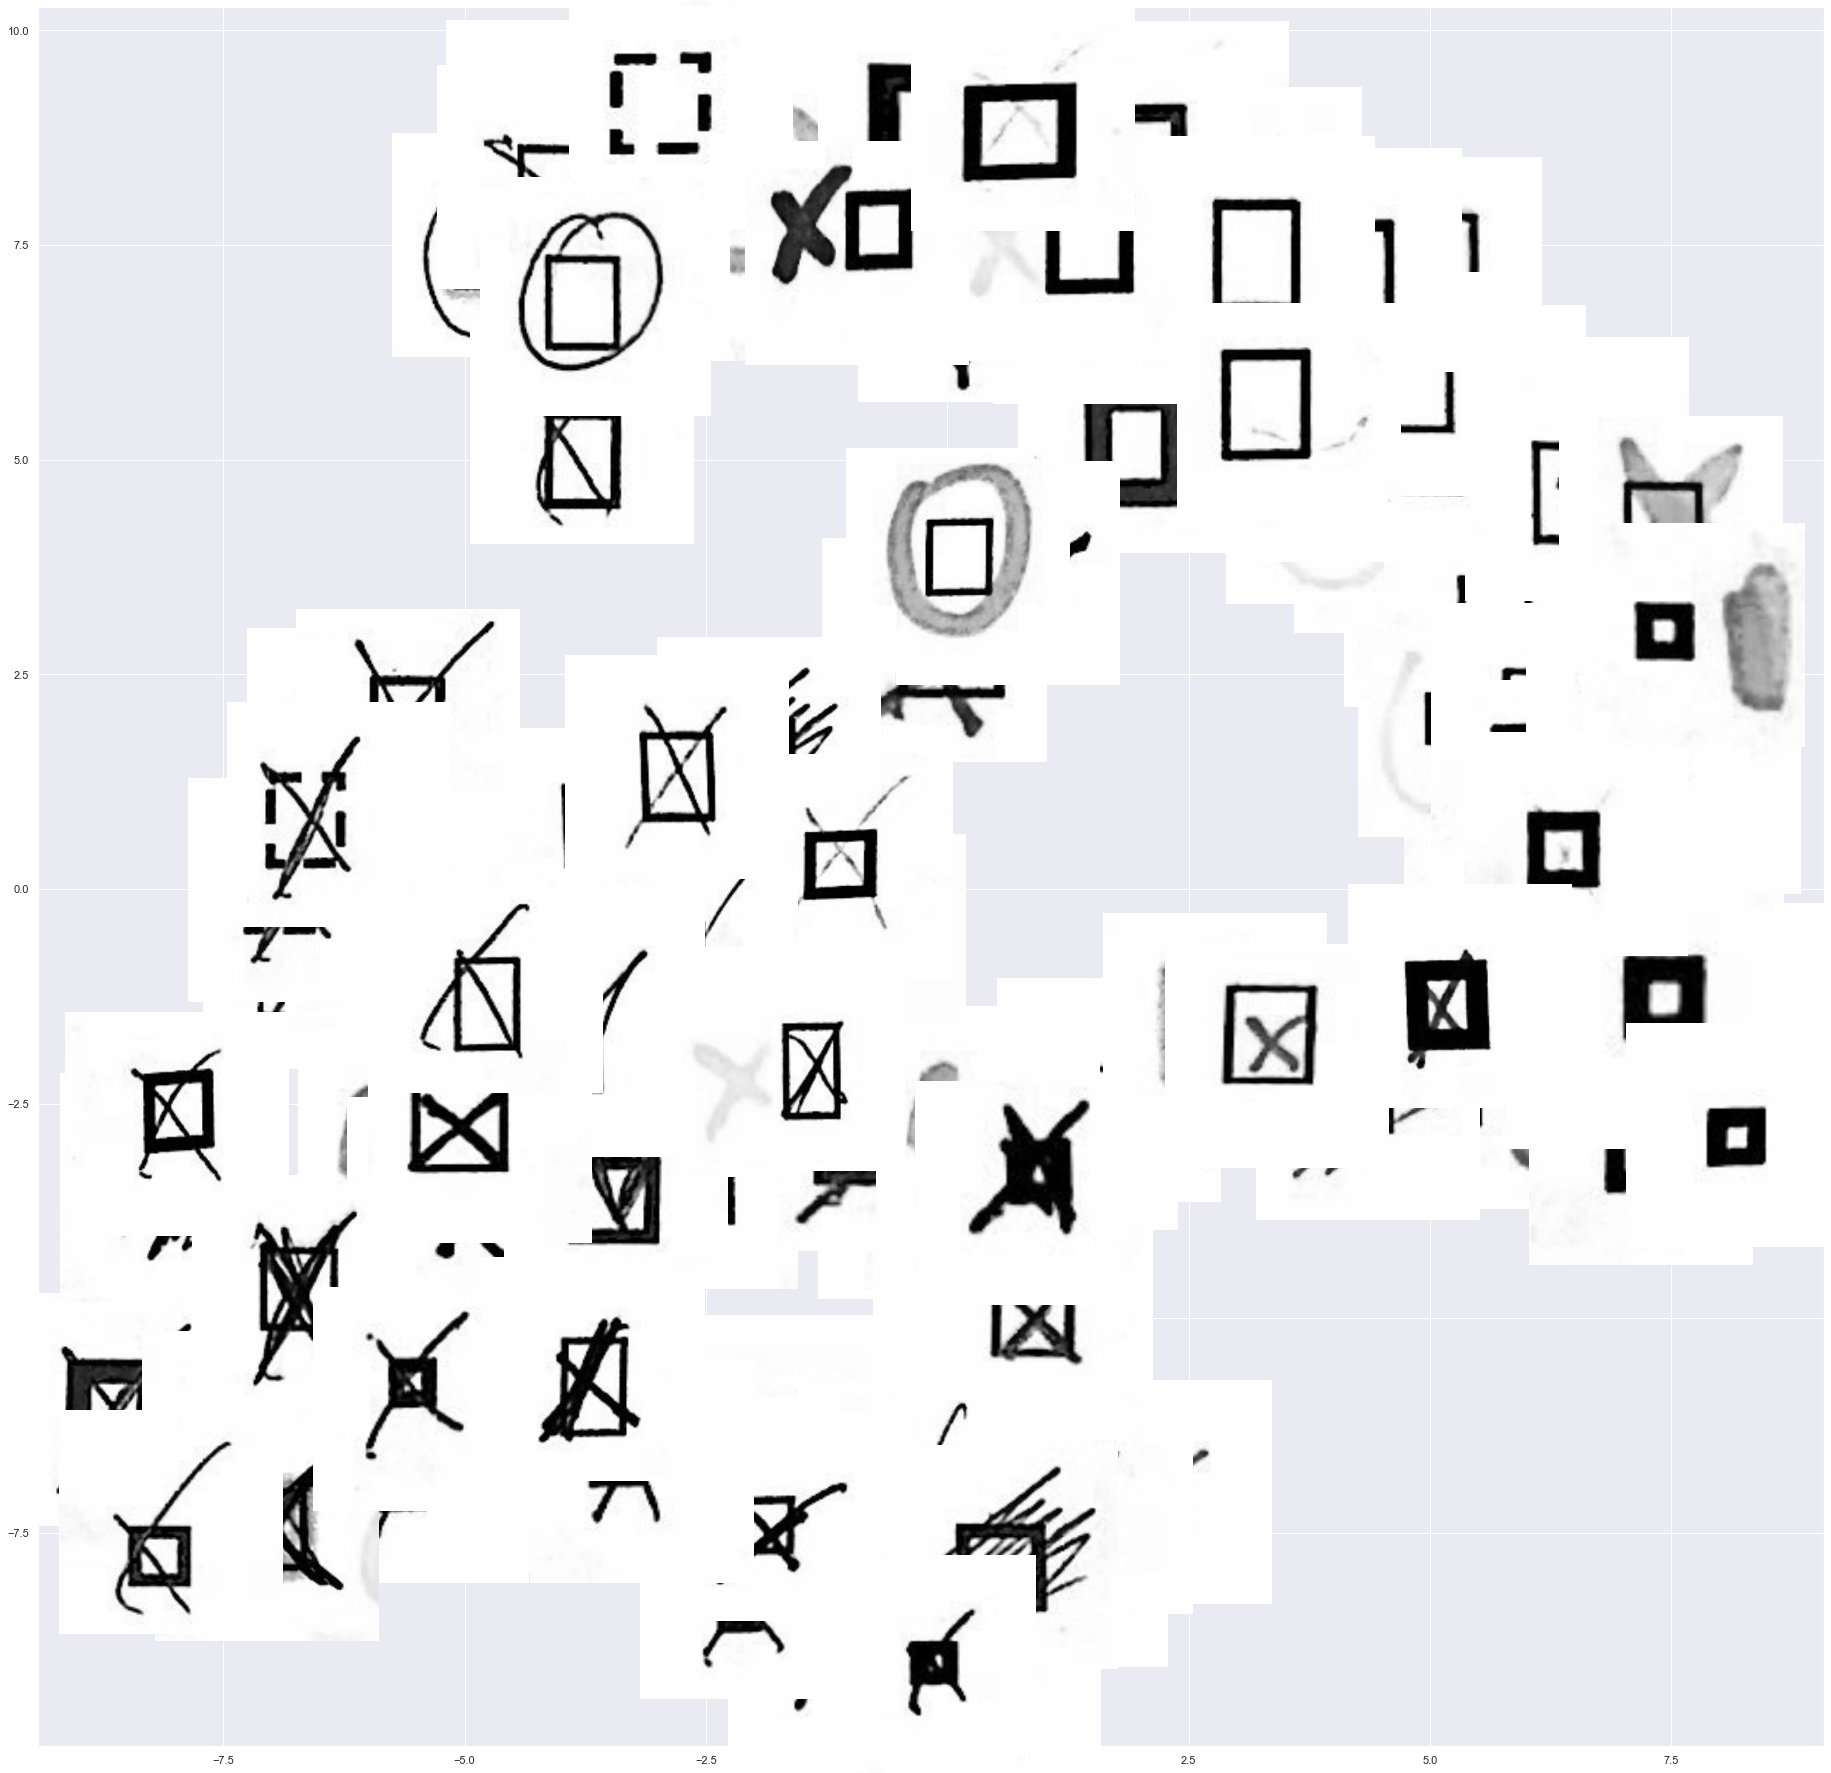

In [36]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def visualize_scatter_with_images(X_2d_data, images, figsize=(32, 32), image_zoom=1.0):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, img in zip(X_2d_data, images):
        x0, y0 = xy
        img = cv2.cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        # img = cv2.cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = OffsetImage(img, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()


visualize_scatter_with_images(embeddings_tsne,
                              images=x_test)